<a href="https://colab.research.google.com/github/vargheseangeli/Spring2025FVLabUGResearch/blob/main/boneimmunedata_fillna0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bone Immune Data Analysis

Angeli Varghese

NaN values were replaced by 0.

In [113]:
pip install ISLP

In [114]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [115]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [116]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [117]:
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage
import seaborn as sns

In [118]:
week8=pd.read_csv('week8.csv')
week8

CODE GROUP TREATMENT  ID  WEEK       CTX1       P1NP  Osteocalcin  \
0   SHAM.CON.8wk  SHAM       CON  27     8   8.678396  33.352875    43.001483   
1   SHAM.CON.8wk  SHAM       CON  28     8  10.621891  24.924023    25.214914   
2   SHAM.CON.8wk  SHAM       CON  29     8   8.724400  18.915117    17.316432   
3   SHAM.CON.8wk  SHAM       CON  30     8        NaN        NaN          NaN   
4   SHAM.CON.8wk  SHAM       CON  31     8  10.588232  22.263223    60.376019   
5   SHAM.CON.8wk  SHAM       CON  32     8   6.193446  21.564442    31.918405   
6   SHAM.CON.8wk  SHAM       CON  33     8        NaN        NaN          NaN   
7   SHAM.CON.8wk  SHAM       CON  34     8   9.363910  33.984705          NaN   
8   SHAM.CON.8wk  SHAM       CON  35     8   8.359306  19.519946    19.608305   
9   SHAM.CON.8wk  SHAM       CON  36     8  11.306601  21.584637    25.214914   
10  SHAM.CON.8wk  SHAM       CON  37     8        NaN        NaN          NaN   
11  SHAM.CON.8wk  SHAM       CON  38     8        NaN        NaN          NaN   
12   OVX.CON.8wk   OVX       CON  39     8  11.306601  24.451635    31.284779   
13   OVX.CON.8wk   OVX       CON  40     8  13.405773  29.223103          NaN   
14   OVX.CON.8wk   OVX       CON  41     8  12.671102  30.053372    72.189993   
15   OVX.CON.8wk   OVX       CON  42     8        NaN        NaN          NaN   
16   OVX.CON.8wk   OVX       CON  43     8  20.403581  30.727307    76.750690   
17   OVX.CON.8wk   OVX       CON  44     8  11.463753  22.879739    10.770843   
18   OVX.CON.8wk   OVX       CON  45     8  12.321855  19.126278    54.242681   
19   OVX.CON.8wk   OVX       CON  46     8        NaN        NaN          NaN   
20   OVX.CON.8wk   OVX       CON  47     8        NaN        NaN          NaN   
21   OVX.CON.8wk   OVX       CON  48     8        NaN        NaN          NaN   
22   OVX.CON.8wk   OVX       CON  49     8  17.571660  19.483802    68.110899   
23   OVX.CON.8wk   OVX       CON  50     8  14.910253  24.900145    24.827034   
24  SHAM.GOS.8wk  SHAM       GOS  51     8        NaN        NaN          NaN   
25  SHAM.GOS.8wk  SHAM       GOS  52     8   9.002665  19.738325    47.695974   
26  SHAM.GOS.8wk  SHAM       GOS  53     8  10.073351  21.972422    29.413434   
27  SHAM.GOS.8wk  SHAM       GOS  54     8   8.344238  19.126278    10.770843   
28  SHAM.GOS.8wk  SHAM       GOS  55     8        NaN        NaN          NaN   
29  SHAM.GOS.8wk  SHAM       GOS  56     8   7.780039  15.668973     6.226505   
30  SHAM.GOS.8wk  SHAM       GOS  57     8        NaN        NaN          NaN   
31  SHAM.GOS.8wk  SHAM       GOS  58     8  11.996064  17.231206    33.849317   
32  SHAM.GOS.8wk  SHAM       GOS  59     8   8.060115  16.931919          NaN   
33  SHAM.GOS.8wk  SHAM       GOS  60     8  10.024194  18.111352    38.305989   
34  SHAM.GOS.8wk  SHAM       GOS  61     8  15.364816  21.828643    25.604849   
35  SHAM.GOS.8wk  SHAM       GOS  62     8        NaN        NaN          NaN   
36  SHAM.GOS.8wk  SHAM       GOS  63     8        NaN        NaN          NaN   
37   OVX.GOS.8wk   OVX       GOS  64     8   8.045274  18.483049    24.249051   
38   OVX.GOS.8wk   OVX       GOS  65     8   8.254073  20.870799    46.437761   
39   OVX.GOS.8wk   OVX       GOS  66     8   7.634227  19.610620    46.188099   
40   OVX.GOS.8wk   OVX       GOS  67     8        NaN        NaN          NaN   
41   OVX.GOS.8wk   OVX       GOS  68     8        NaN        NaN          NaN   
42   OVX.GOS.8wk   OVX       GOS  69     8   9.747833  11.944576    32.770993   
43   OVX.GOS.8wk   OVX       GOS  70     8        NaN        NaN          NaN   
44   OVX.GOS.8wk   OVX       GOS  71     8   9.065028  12.047518    24.633863   
45   OVX.GOS.8wk   OVX       GOS  72     8  11.657408  18.862713    31.706645   
46   OVX.GOS.8wk   OVX       GOS  73     8        NaN        NaN          NaN   
47   OVX.GOS.8wk   OVX       GOS  74     8   8.632497  14.110485    55.331110   
48   OVX.GOS.8wk   OVX       GOS  75     8 

In [119]:
week8.columns

Index(['CODE', 'GROUP', 'TREATMENT', 'ID', 'WEEK', 'CTX1', 'P1NP',
       'Osteocalcin', 'f_BVTV', 'f_TbTh', 'f_TbSp', 'f_TbN', 'f_Tt.Ar',
       'f_Ct.Ar', 'f_Ct.Th', 'f_Ct.Ar/Tt.Ar', 'f_Ma.A', 'v_BVTV', 'v_TbTh',
       'v_TbSp', 'v_TbN', 'facs_CD3, %', 'facs_CD4/CD3, %', 'facs_CD8/CD3, %',
       'facs_CD25CD4/CD3, %', 'facs_Treg, %', 'facs_Th17, %',
       'facs_CD3, cells', 'facs_CD4/CD3, cells', 'facs_CD8/CD3, cells',
       'facs_CD25CD4/CD3, cells', 'facs_Treg, cells', 'facs_Th17, cells',
       'Uterine Weight', 'Cecal Content', 'sBMD_rel_change', 'sBMC_rel_change',
       'sBMA_rel_change', 'fBMD_rel_change', 'fBMC_rel_change',
       'fBMA_rel_change', 'BMD_rel_change', 'BMC_rel_change', 'BA_rel_change',
       'Lean_rel_change', 'Fat_rel_change', 'Fatp_rel_change', 'Wt_rel_change',
       'weekly_body_weight_rel_change'],
      dtype='object')

In [120]:
id_change=pd.DataFrame(week8,columns=['ID'])
for i in range(0,50):
 id_change.iloc[i]=id_change.iloc[i]-26

week8_new=pd.DataFrame(week8)
week8_new['ID']=id_change

In [121]:
week8_new= week8_new.fillna(0)
week8_new



CODE GROUP TREATMENT  ID  WEEK       CTX1       P1NP  Osteocalcin  \
0   SHAM.CON.8wk  SHAM       CON   1     8   8.678396  33.352875    43.001483   
1   SHAM.CON.8wk  SHAM       CON   2     8  10.621891  24.924023    25.214914   
2   SHAM.CON.8wk  SHAM       CON   3     8   8.724400  18.915117    17.316432   
3   SHAM.CON.8wk  SHAM       CON   4     8   0.000000   0.000000     0.000000   
4   SHAM.CON.8wk  SHAM       CON   5     8  10.588232  22.263223    60.376019   
5   SHAM.CON.8wk  SHAM       CON   6     8   6.193446  21.564442    31.918405   
6   SHAM.CON.8wk  SHAM       CON   7     8   0.000000   0.000000     0.000000   
7   SHAM.CON.8wk  SHAM       CON   8     8   9.363910  33.984705     0.000000   
8   SHAM.CON.8wk  SHAM       CON   9     8   8.359306  19.519946    19.608305   
9   SHAM.CON.8wk  SHAM       CON  10     8  11.306601  21.584637    25.214914   
10  SHAM.CON.8wk  SHAM       CON  11     8   0.000000   0.000000     0.000000   
11  SHAM.CON.8wk  SHAM       CON  12     8   0.000000   0.000000     0.000000   
12   OVX.CON.8wk   OVX       CON  13     8  11.306601  24.451635    31.284779   
13   OVX.CON.8wk   OVX       CON  14     8  13.405773  29.223103     0.000000   
14   OVX.CON.8wk   OVX       CON  15     8  12.671102  30.053372    72.189993   
15   OVX.CON.8wk   OVX       CON  16     8   0.000000   0.000000     0.000000   
16   OVX.CON.8wk   OVX       CON  17     8  20.403581  30.727307    76.750690   
17   OVX.CON.8wk   OVX       CON  18     8  11.463753  22.879739    10.770843   
18   OVX.CON.8wk   OVX       CON  19     8  12.321855  19.126278    54.242681   
19   OVX.CON.8wk   OVX       CON  20     8   0.000000   0.000000     0.000000   
20   OVX.CON.8wk   OVX       CON  21     8   0.000000   0.000000     0.000000   
21   OVX.CON.8wk   OVX       CON  22     8   0.000000   0.000000     0.000000   
22   OVX.CON.8wk   OVX       CON  23     8  17.571660  19.483802    68.110899   
23   OVX.CON.8wk   OVX       CON  24     8  14.910253  24.900145    24.827034   
24  SHAM.GOS.8wk  SHAM       GOS  25     8   0.000000   0.000000     0.000000   
25  SHAM.GOS.8wk  SHAM       GOS  26     8   9.002665  19.738325    47.695974   
26  SHAM.GOS.8wk  SHAM       GOS  27     8  10.073351  21.972422    29.413434   
27  SHAM.GOS.8wk  SHAM       GOS  28     8   8.344238  19.126278    10.770843   
28  SHAM.GOS.8wk  SHAM       GOS  29     8   0.000000   0.000000     0.000000   
29  SHAM.GOS.8wk  SHAM       GOS  30     8   7.780039  15.668973     6.226505   
30  SHAM.GOS.8wk  SHAM       GOS  31     8   0.000000   0.000000     0.000000   
31  SHAM.GOS.8wk  SHAM       GOS  32     8  11.996064  17.231206    33.849317   
32  SHAM.GOS.8wk  SHAM       GOS  33     8   8.060115  16.931919     0.000000   
33  SHAM.GOS.8wk  SHAM       GOS  34     8  10.024194  18.111352    38.305989   
34  SHAM.GOS.8wk  SHAM       GOS  35     8  15.364816  21.828643    25.604849   
35  SHAM.GOS.8wk  SHAM       GOS  36     8   0.000000   0.000000     0.000000   
36  SHAM.GOS.8wk  SHAM       GOS  37     8   0.000000   0.000000     0.000000   
37   OVX.GOS.8wk   OVX       GOS  38     8   8.045274  18.483049    24.249051   
38   OVX.GOS.8wk   OVX       GOS  39     8   8.254073  20.870799    46.437761   
39   OVX.GOS.8wk   OVX       GOS  40     8   7.634227  19.610620    46.188099   
40   OVX.GOS.8wk   OVX       GOS  41     8   0.000000   0.000000     0.000000   
41   OVX.GOS.8wk   OVX       GOS  42     8   0.000000   0.000000     0.000000   
42   OVX.GOS.8wk   OVX       GOS  43     8   9.747833  11.944576    32.770993   
43   OVX.GOS.8wk   OVX       GOS  44     8   0.000000   0.000000     0.000000   
44   OVX.GOS.8wk   OVX       GOS  45     8   9.065028  12.047518    24.633863   
45   OVX.GOS.8wk   OVX       GOS  46     8  11.657408  18.862713    31.706645   
46   OVX.GOS.8wk   OVX       GOS  47     8   0.000000   0.000000     0.000000   
47   OVX.GOS.8wk   OVX       GOS  48     8   8.632497  14.110485    55.331110   
48   OVX.GOS.8wk   OVX       GOS  49     8 

In [122]:
week8_new.describe()

ID  WEEK       CTX1       P1NP  Osteocalcin     f_BVTV  \
count  50.00000  50.0  50.000000  50.000000    50.000000  50.000000   
mean   25.50000   8.0   6.775801  13.511504    21.019126   6.322958   
std    14.57738   0.0   5.700411  11.190764    22.735109   5.526926   
min     1.00000   8.0   0.000000   0.000000     0.000000   0.000000   
25%    13.25000   8.0   0.000000   0.000000     0.000000   0.000000   
50%    25.50000   8.0   8.299155  17.671279    18.462368   6.905037   
75%    37.75000   8.0  10.613476  21.579588    33.579736   9.622665   
max    50.00000   8.0  20.403581  33.984705    76.750690  18.732723   

          f_TbTh     f_TbSp      f_TbN    f_Tt.Ar  ...  fBMC_rel_change  \
count  50.000000  50.000000  50.000000  50.000000  ...        50.000000   
mean    0.039236   0.179108   1.012804   1.191043  ...         0.150177   
std     0.030155   0.137034   0.833063   0.904333  ...         0.088919   
min     0.000000   0.000000   0.000000   0.000000  ...        -0.081081   
25%     0.000000   0.000000   0.000000   0.000000  ...         0.094506   
50%     0.056080   0.259836   1.234142   1.810157  ...         0.163978   
75%     0.061056   0.291323   1.673032   1.884609  ...         0.192036   
max     0.077128   0.317209   2.648435   2.007753  ...         0.366667   

       fBMA_rel_change  BMD_rel_change  BMC_rel_change  BA_rel_change  \
count        50.000000       50.000000       50.000000      50.000000   
mean          0.051418        0.072133        0.088935       0.015292   
std           0.067159        0.043338        0.069283       0.057136   
min          -0.157895       -0.020833       -0.040080      -0.097098   
25%           0.020408        0.046041        0.043128      -0.017244   
50%           0.043016        0.068266        0.076002       0.010364   
75%           0.108844        0.106995        0.125719       0.043113   
max           0.181818        0.165657        0.261614       0.173971   

       Lean_rel_change  Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
count        50.000000       50.000000        50.000000      50.000000   
mean          0.118155        1.054253         0.643615       0.187559   
std           0.072665        0.869444         0.534233       0.109570   
min          -0.022857       -0.038462        -0.141844       0.000000   
25%           0.061310        0.337500         0.223107       0.097250   
50%           0.116984        0.809524         0.579806       0.183519   
75%           0.173577        1.621528         0.969542       0.266358   
max           0.285714        3.555556         2.091954       0.447761   

       weekly_body_weight_rel_change  
count                      50.000000  
mean                        0.266821  
std                         0.145331  
min                         0.017857  
25%                         0.148655  
50%                         0.233192  
75%                         0.404878  
max                         0.563636  

[8 rows x 46 columns]

In [123]:
corr_table=week8_new.corr(numeric_only=True)
corr_table

ID  WEEK      CTX1      P1NP  \
ID                             1.000000   NaN -0.144854 -0.321073   
WEEK                                NaN   NaN       NaN       NaN   
CTX1                          -0.144854   NaN  1.000000  0.892519   
P1NP                          -0.321073   NaN  0.892519  1.000000   
Osteocalcin                   -0.044582   NaN  0.753561  0.660599   
f_BVTV                         0.059079   NaN  0.572105  0.534803   
f_TbTh                        -0.040394   NaN  0.616287  0.601304   
f_TbSp                        -0.119844   NaN  0.613033  0.615872   
f_TbN                          0.020873   NaN  0.609184  0.576900   
f_Tt.Ar                       -0.086895   NaN  0.623378  0.616271   
f_Ct.Ar                       -0.083479   NaN  0.626004  0.611826   
f_Ct.Th                       -0.085527   NaN  0.628601  0.614269   
f_Ct.Ar/Tt.Ar                 -0.085554   NaN  0.629335  0.616448   
f_Ma.A                        -0.090091   NaN  0.616932  0.617524   
v_BVTV                        -0.020172   NaN  0.627802  0.601247   
v_TbTh                        -0.056705   NaN  0.621081  0.607448   
v_TbSp                        -0.120207   NaN  0.604040  0.614126   
v_TbN                         -0.053380   NaN  0.640432  0.621323   
facs_CD3, %                   -0.100894   NaN -0.038385  0.034360   
facs_CD4/CD3, %                0.046830   NaN -0.016116 -0.123969   
facs_CD8/CD3, %               -0.245529   NaN  0.014533  0.039789   
facs_CD25CD4/CD3, %           -0.225864   NaN -0.077821  0.089688   
facs_Treg, %                  -0.270413   NaN -0.051687  0.096771   
facs_Th17, %                   0.010532   NaN  0.012627  0.092960   
facs_CD3, cells               -0.130072   NaN  0.027054  0.204860   
facs_CD4/CD3, cells           -0.062362   NaN  0.065378  0.111158   
facs_CD8/CD3, cells           -0.313298   NaN  0.124455  0.293821   
facs_CD25CD4/CD3, cells       -0.218173   NaN  0.021389  0.239502   
facs_Treg, cells              -0.255474   NaN  0.042543  0.249924   
facs_Th17, cells              -0.048871   NaN  0.045340  0.183855   
Uterine Weight                -0.422010   NaN -0.111073  0.021241   
Cecal Content                  0.680996   NaN -0.221241 -0.321800   
sBMD_rel_change                0.276543   NaN  0.029567 -0.066162   
sBMC_rel_change                0.164363   NaN -0.086504 -0.131941   
sBMA_rel_change               -0.089885   NaN -0.121580 -0.128857   
fBMD_rel_change                0.298085   NaN -0.017818 -0.076509   
fBMC_rel_change                0.043672   NaN -0.079482 -0.078949   
fBMA_rel_change               -0.213841   NaN -0.132019 -0.074786   
BMD_rel_change                 0.319164   NaN -0.141068 -0.238972   
BMC_rel_change                 0.144306   NaN  0.051809  0.018261   
BA_rel_change                 -0.079490   NaN  0.161756  0.193374   
Lean_rel_change                0.603294   NaN -0.027962 -0.231563   
Fat_rel_change                 0.525174   NaN -0.054040 -0.095290   
Fatp_rel_change                0.467417   NaN -0.038993 -0.059842   
Wt_rel_change                  0.620015   NaN -0.059816 -0.189887   
weekly_body_weight_rel_change  0.619353   NaN  0.045205 -0.053105   

                               Osteocalcin    f_BVTV    f_TbTh    f_TbSp  \
ID                               -0.044582  0.059079 -0.040394 -0.119844   
WEEK                                   NaN       NaN       NaN       NaN   
CTX1                              0.753561  0.572105  0.616287  0.613033   
P1NP                              0.660599  0.534803  0.601304  0.615872   
Osteocalcin                       1.000000  0.344976  0.419099  0.451649   
f_BVTV                            0.344976  1.000000  0.925438  0.794271   
f_TbTh                            0.419099  0.925438  1.000000  0.960829   
f_TbSp                            0.451649  0.794271  0.960829  1.000000   
f_TbN                             0.389347  0.986973  0.954166  0.859955   
f_Tt.Ar                          

In [124]:
fBVTV_corr=corr_table['f_BVTV']
fBVTV_corr.sort_values(ascending=False)

f_BVTV                           1.000000
f_TbN                            0.986973
v_BVTV                           0.950750
f_TbTh                           0.925438
v_TbTh                           0.919183
v_TbN                            0.908443
f_Ct.Th                          0.892074
f_Ct.Ar/Tt.Ar                    0.891907
f_Ct.Ar                          0.883630
f_Tt.Ar                          0.857130
f_Ma.A                           0.823484
v_TbSp                           0.815773
f_TbSp                           0.794271
CTX1                             0.572105
P1NP                             0.534803
Osteocalcin                      0.344976
fBMD_rel_change                  0.292754
sBMD_rel_change                  0.257623
BMC_rel_change                   0.215097
BMD_rel_change                   0.188030
Uterine Weight                   0.183598
sBMC_rel_change                  0.166762
facs_CD8/CD3, cells              0.141418
BA_rel_change                    0.106925
fBMC_rel_change                  0.103675
facs_CD8/CD3, %                  0.099542
ID                               0.059079
facs_CD4/CD3, cells              0.026256
sBMA_rel_change                  0.025317
Cecal Content                   -0.010349
facs_Th17, cells                -0.029582
facs_CD4/CD3, %                 -0.046743
facs_CD25CD4/CD3, cells         -0.049188
facs_Treg, cells                -0.055255
facs_Th17, %                    -0.055991
weekly_body_weight_rel_change   -0.061139
facs_CD3, cells                 -0.062532
Lean_rel_change                 -0.068980
Fatp_rel_change                 -0.099831
Fat_rel_change                  -0.110461
facs_CD3, %                     -0.110634
Wt_rel_change                   -0.119321
facs_CD25CD4/CD3, %             -0.141992
fBMA_rel_change                 -0.152806
facs_Treg, %                    -0.167822
WEEK                                  NaN
Name: f_BVTV, dtype: float64

In [125]:
vBVTV_corr=corr_table['v_BVTV']
vBVTV_corr.sort_values(ascending=False)

v_BVTV                           1.000000
v_TbTh                           0.991011
v_TbN                            0.989517
f_TbTh                           0.988354
f_Ct.Th                          0.980841
f_Ct.Ar/Tt.Ar                    0.979596
f_Ct.Ar                          0.977338
f_TbN                            0.975492
f_Tt.Ar                          0.964672
f_BVTV                           0.950750
f_Ma.A                           0.945384
v_TbSp                           0.931984
f_TbSp                           0.931588
CTX1                             0.627802
P1NP                             0.601247
Osteocalcin                      0.444589
sBMD_rel_change                  0.259225
facs_CD8/CD3, cells              0.231164
fBMD_rel_change                  0.179914
BMC_rel_change                   0.147915
facs_CD4/CD3, cells              0.140975
sBMC_rel_change                  0.130587
BMD_rel_change                   0.115869
facs_CD8/CD3, %                  0.099732
Uterine Weight                   0.099557
BA_rel_change                    0.087191
facs_Treg, cells                 0.077518
facs_CD25CD4/CD3, cells          0.071660
facs_Th17, cells                 0.042819
facs_CD3, cells                  0.013983
fBMC_rel_change                  0.002824
weekly_body_weight_rel_change    0.001249
facs_CD4/CD3, %                 -0.004486
Fatp_rel_change                 -0.012753
sBMA_rel_change                 -0.016850
ID                              -0.020172
facs_Th17, %                    -0.022981
Fat_rel_change                  -0.036367
facs_CD25CD4/CD3, %             -0.068251
Wt_rel_change                   -0.070317
facs_Treg, %                    -0.072785
Lean_rel_change                 -0.082612
facs_CD3, %                     -0.083885
Cecal Content                   -0.110524
fBMA_rel_change                 -0.173348
WEEK                                  NaN
Name: v_BVTV, dtype: float64

In [126]:
sns.pairplot(week8_new)

# Linear Regression Model
Replaced NaN values with 0

Bone biomarkers(osteocalcin, ctx1, p1np) vs response variable(v_BVTV or f_BVTV)

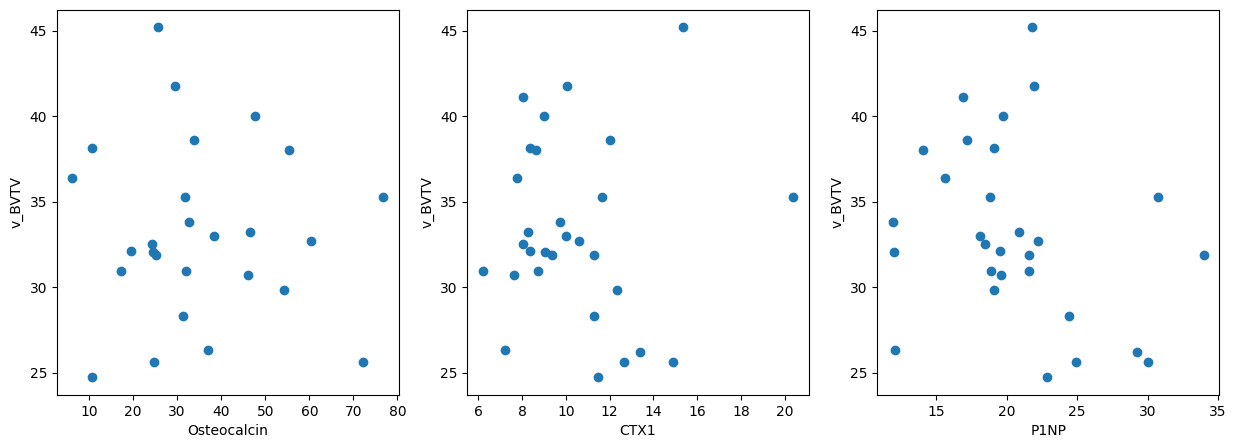

In [127]:
fig, axes = subplots(nrows=1,
                     ncols=3,
                     figsize=(15, 5))

axes[0].scatter(week8['Osteocalcin'],week8['v_BVTV'])
axes[0].set_xlabel('Osteocalcin')
axes[0].set_ylabel('v_BVTV')

axes[1].scatter(week8['CTX1'],week8['v_BVTV'])
axes[1].set_xlabel('CTX1')
axes[1].set_ylabel('v_BVTV')

axes[2].scatter(week8['P1NP'],week8['v_BVTV'])
axes[2].set_xlabel('P1NP')
axes[2].set_ylabel('v_BVTV')

plt.show()

In [128]:
y=week8_new['v_BVTV']
X=pd.DataFrame({'intercept': np.ones(50), 'Osteocalcin': week8_new['Osteocalcin'], 'CTX1': week8_new['CTX1'], 'P1NP': week8_new['P1NP']})
print(X)

    intercept  Osteocalcin       CTX1       P1NP
0         1.0    43.001483   8.678396  33.352875
1         1.0    25.214914  10.621891  24.924023
2         1.0    17.316432   8.724400  18.915117
3         1.0     0.000000   0.000000   0.000000
4         1.0    60.376019  10.588232  22.263223
5         1.0    31.918405   6.193446  21.564442
6         1.0     0.000000   0.000000   0.000000
7         1.0     0.000000   9.363910  33.984705
8         1.0    19.608305   8.359306  19.519946
9         1.0    25.214914  11.306601  21.584637
10        1.0     0.000000   0.000000   0.000000
11        1.0     0.000000   0.000000   0.000000
12        1.0    31.284779  11.306601  24.451635
13        1.0     0.000000  13.405773  29.223103
14        1.0    72.189993  12.671102  30.053372
15        1.0     0.000000   0.000000   0.000000
16        1.0    76.750690  20.403581  30.727307
17        1.0    10.770843  11.463753  22.879739
18        1.0    54.242681  12.321855  19.126278
19        1.0     0.

In [129]:
model=sm.OLS(y,X)
results=model.fit()
summarize(results)

coef  std err      t  P>|t|
intercept    8.3082    2.959  2.807  0.007
Osteocalcin -0.0437    0.125 -0.349  0.729
CTX1         1.4330    0.832  1.723  0.092
P1NP         0.2903    0.371  0.782  0.438

In [130]:
results.params

intercept      8.308163
Osteocalcin   -0.043719
CTX1           1.433049
P1NP           0.290258
dtype: float64

/tmp/ipython-input-3804202080.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipython-input-3804202080.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],
/tmp/ipython-input-3804202080.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipython-input-3804202080.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versi

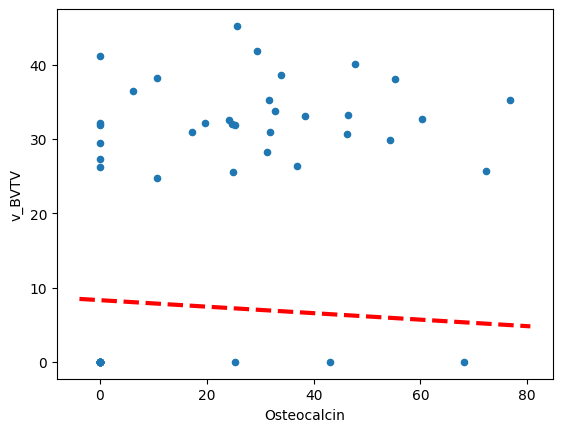

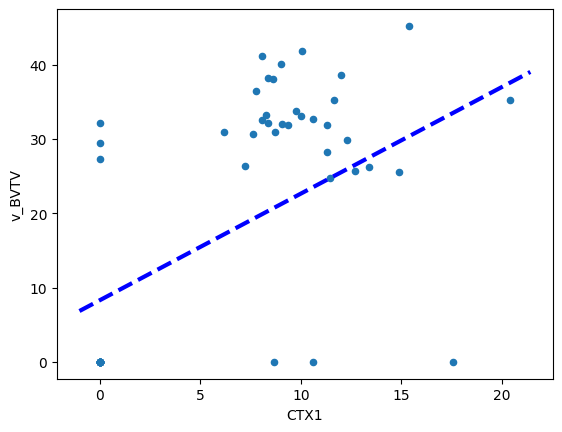

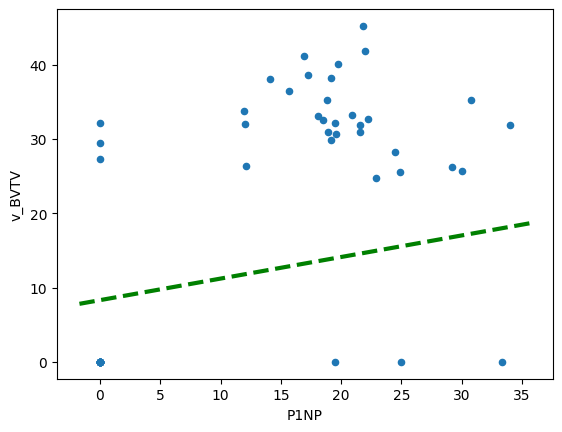

In [131]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


ax = week8_new.plot.scatter('Osteocalcin', 'v_BVTV')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

ax = week8_new.plot.scatter('CTX1', 'v_BVTV')
abline(ax,
       results.params[0],
       results.params[2],
       'b--',
       linewidth=3)

ax = week8_new.plot.scatter('P1NP', 'v_BVTV')
abline(ax,
       results.params[0],
       results.params[3],
       'g--',
       linewidth=3)

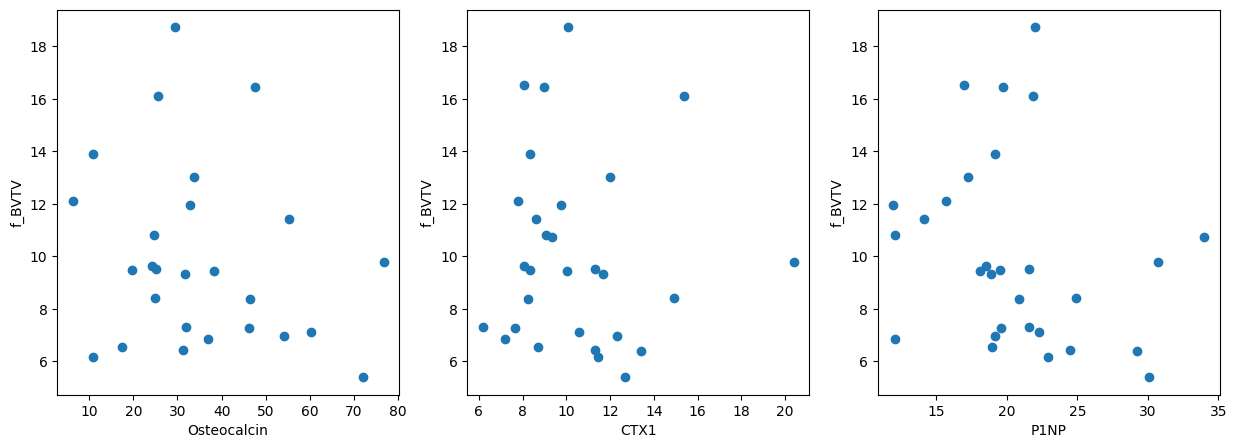

In [132]:
fig, axes = subplots(nrows=1,
                     ncols=3,
                     figsize=(15, 5))

axes[0].scatter(week8['Osteocalcin'],week8['f_BVTV'])
axes[0].set_xlabel('Osteocalcin')
axes[0].set_ylabel('f_BVTV')

axes[1].scatter(week8['CTX1'],week8['f_BVTV'])
axes[1].set_xlabel('CTX1')
axes[1].set_ylabel('f_BVTV')

axes[2].scatter(week8['P1NP'],week8['f_BVTV'])
axes[2].set_xlabel('P1NP')
axes[2].set_ylabel('f_BVTV')

plt.show()

In [133]:
y=week8_new['f_BVTV']
X=pd.DataFrame({'intercept': np.ones(50), 'Osteocalcin': week8_new['Osteocalcin'], 'CTX1': week8_new['CTX1'], 'P1NP': week8_new['P1NP']})
print(X)

    intercept  Osteocalcin       CTX1       P1NP
0         1.0    43.001483   8.678396  33.352875
1         1.0    25.214914  10.621891  24.924023
2         1.0    17.316432   8.724400  18.915117
3         1.0     0.000000   0.000000   0.000000
4         1.0    60.376019  10.588232  22.263223
5         1.0    31.918405   6.193446  21.564442
6         1.0     0.000000   0.000000   0.000000
7         1.0     0.000000   9.363910  33.984705
8         1.0    19.608305   8.359306  19.519946
9         1.0    25.214914  11.306601  21.584637
10        1.0     0.000000   0.000000   0.000000
11        1.0     0.000000   0.000000   0.000000
12        1.0    31.284779  11.306601  24.451635
13        1.0     0.000000  13.405773  29.223103
14        1.0    72.189993  12.671102  30.053372
15        1.0     0.000000   0.000000   0.000000
16        1.0    76.750690  20.403581  30.727307
17        1.0    10.770843  11.463753  22.879739
18        1.0    54.242681  12.321855  19.126278
19        1.0     0.

In [134]:
model=sm.OLS(y,X)
results=model.fit()
summarize(results)

coef  std err      t  P>|t|
intercept    2.5088    1.042  2.408  0.020
Osteocalcin -0.0477    0.044 -1.082  0.285
CTX1         0.6053    0.293  2.067  0.044
P1NP         0.0530    0.131  0.406  0.687

In [135]:
results.params

intercept      2.508799
Osteocalcin   -0.047735
CTX1           0.605251
P1NP           0.053024
dtype: float64

/tmp/ipython-input-736522463.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipython-input-736522463.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],
/tmp/ipython-input-736522463.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipython-input-736522463.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

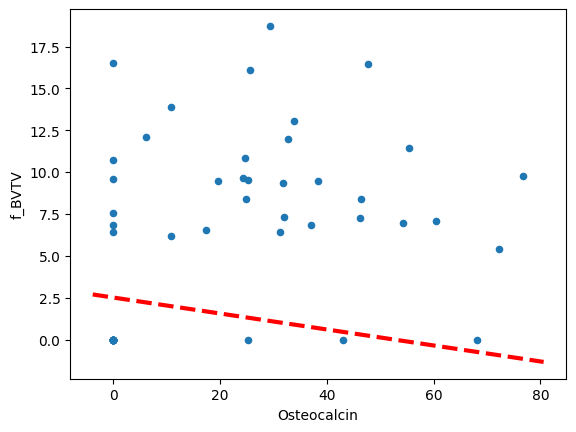

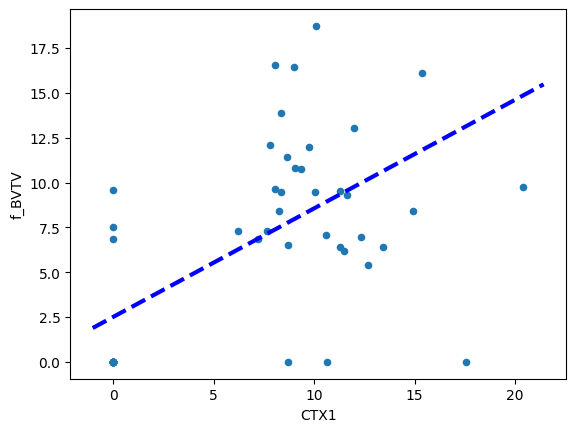

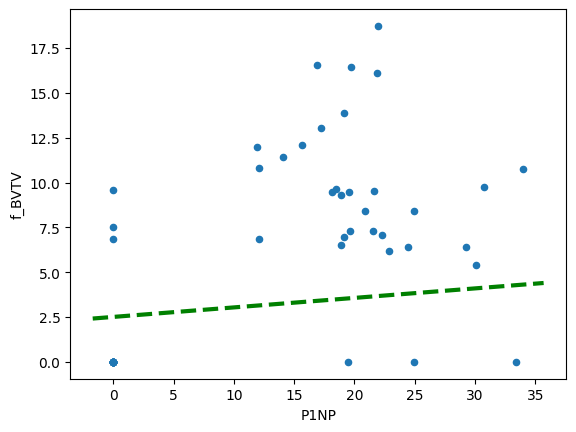

In [136]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


ax = week8_new.plot.scatter('Osteocalcin', 'f_BVTV')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

ax = week8_new.plot.scatter('CTX1', 'f_BVTV')
abline(ax,
       results.params[0],
       results.params[2],
       'b--',
       linewidth=3)

ax = week8_new.plot.scatter('P1NP', 'f_BVTV')
abline(ax,
       results.params[0],
       results.params[3],
       'g--',
       linewidth=3)

# Adding dummy variables for ovx, sham, con and gos
Dropped ID, WEEK, uterine weight and cecal weight columns

In [137]:
week8_num=pd.get_dummies(week8_new)

cols=[0,1,30,31]
week8_num=week8_num.drop(week8_num.columns[cols],axis=1)

week8_num['Groups']='SHAM_CON'
week8_num.loc[week8_num['CODE_OVX.CON.8wk']==True,'Groups']='OVX_CON'
week8_num.loc[week8_num['CODE_OVX.GOS.8wk']==True,'Groups']='OVX_GOS'
week8_num.loc[week8_num['CODE_SHAM.GOS.8wk']==True,'Groups']='SHAM_GOS'
week8_num

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
0    8.678396  33.352875    43.001483   0.000000  0.000000  0.000000   
1   10.621891  24.924023    25.214914   0.000000  0.000000  0.000000   
2    8.724400  18.915117    17.316432   6.533580  0.060940  0.314338   
3    0.000000   0.000000     0.000000   9.561600  0.061400  0.282400   
4   10.588232  22.263223    60.376019   7.097617  0.056343  0.293051   
5    6.193446  21.564442    31.918405   7.297900  0.058200  0.301600   
6    0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
7    9.363910  33.984705     0.000000  10.729665  0.058021  0.259600   
8    8.359306  19.519946    19.608305   9.479761  0.063193  0.277121   
9   11.306601  21.584637    25.214914   9.502290  0.061055  0.279668   
10   0.000000   0.000000     0.000000   7.546084  0.056821  0.291818   
11   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
12  11.306601  24.451635    31.284779   6.416905  0.053910  0.308359   
13  13.405773  29.223103     0.000000   6.396768  0.056016  0.313107   
14  12.671102  30.053372    72.189993   5.391055  0.053981  0.307243   
15   0.000000   0.000000     0.000000   6.841239  0.053889  0.293742   
16  20.403581  30.727307    76.750690   9.772944  0.055007  0.263181   
17  11.463753  22.879739    10.770843   6.176383  0.056145  0.299415   
18  12.321855  19.126278    54.242681   6.945548  0.054754  0.298015   
19   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
20   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
21   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
22  17.571660  19.483802    68.110899   0.000000  0.000000  0.000000   
23  14.910253  24.900145    24.827034   8.411803  0.054967  0.284869   
24   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
25   9.002665  19.738325    47.695974  16.464109  0.070362  0.239621   
26  10.073351  21.972422    29.413434  18.732723  0.070731  0.220157   
27   8.344238  19.126278    10.770843  13.887900  0.068616  0.243989   
28   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
29   7.780039  15.668973     6.226505  12.096842  0.067774  0.256677   
30   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
31  11.996064  17.231206    33.849317  13.036060  0.071880  0.264899   
32   8.060115  16.931919     0.000000  16.546230  0.077128  0.255090   
33  10.024194  18.111352    38.305989   9.458395  0.064471  0.289839   
34  15.364816  21.828643    25.604849  16.111516  0.073198  0.257288   
35   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
36   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
37   8.045274  18.483049    24.249051   9.643020  0.057305  0.273860   
38   8.254073  20.870799    46.437761   8.389128  0.058152  0.296282   
39   7.634227  19.610620    46.188099   7.281459  0.059950  0.317209   
40   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
41   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
42   9.747833  11.944576    32.770993  11.969587  0.060739  0.261311   
43   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
44   9.065028  12.047518    24.633863  10.822638  0.061056  0.275020   
45  11.657408  18.862713    31.706645   9.319933  0.056694  0.271575   
46   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
47   8.632497  14.110485    55.331110  11.422694  0.064239  0.260071   
48   7.217470  12.081991    36.944498   6.864526  0.064875  0.305008   
49   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  \
0   0.000000  0.000000  0.000000  0.000000  ...   
1   0.000000  0.000000  0.000000  0.000000  ...   
2   1.072141  1.888325  0.973667  0.240256  ...   
3   1.557200  1.841247  0.981967  0.248929  ...   
4   1.259711  1.879604  0.972052  0.238803  ...   
5   1.253700  1.813841  0.9337

<Axes: >

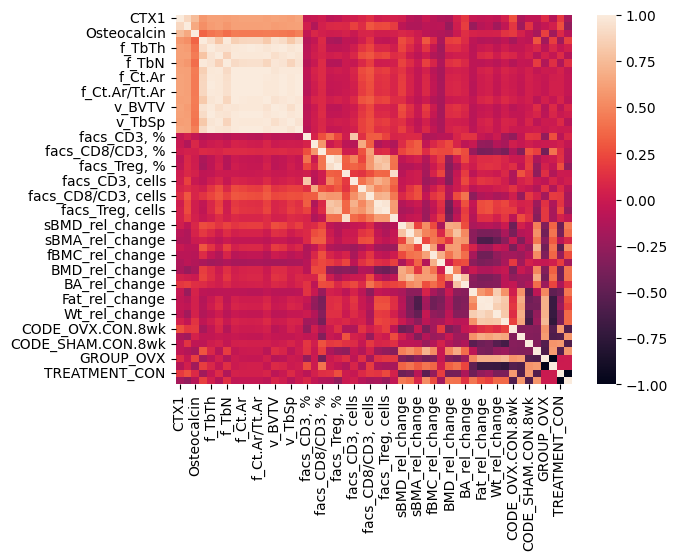

In [217]:
htmap= week8_num.drop(columns=['Groups']).corr(numeric_only=True)
sns.heatmap(htmap)

# Principal Components Analysis

In [141]:
sham_congrp=week8_num.loc[week8_num['Groups']=='SHAM_CON']
cols=[42,43,44,45,46,47,48,49]
sham_congrp=sham_congrp.drop(sham_congrp.columns[cols],axis=1)
sham_congrp

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
0    8.678396  33.352875    43.001483   0.000000  0.000000  0.000000   
1   10.621891  24.924023    25.214914   0.000000  0.000000  0.000000   
2    8.724400  18.915117    17.316432   6.533580  0.060940  0.314338   
3    0.000000   0.000000     0.000000   9.561600  0.061400  0.282400   
4   10.588232  22.263223    60.376019   7.097617  0.056343  0.293051   
5    6.193446  21.564442    31.918405   7.297900  0.058200  0.301600   
6    0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
7    9.363910  33.984705     0.000000  10.729665  0.058021  0.259600   
8    8.359306  19.519946    19.608305   9.479761  0.063193  0.277121   
9   11.306601  21.584637    25.214914   9.502290  0.061055  0.279668   
10   0.000000   0.000000     0.000000   7.546084  0.056821  0.291818   
11   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  \
0   0.000000  0.000000  0.000000  0.000000  ...         0.139535   
1   0.000000  0.000000  0.000000  0.000000  ...        -0.020408   
2   1.072141  1.888325  0.973667  0.240256  ...         0.043478   
3   1.557200  1.841247  0.981967  0.248929  ...         0.090909   
4   1.259711  1.879604  0.972052  0.238803  ...         0.020833   
5   1.253700  1.813841  0.933756  0.238065  ...         0.065217   
6   0.000000  0.000000  0.000000  0.000000  ...         0.000000   
7   1.849272  1.870477  0.990304  0.244555  ...         0.085106   
8   1.500129  2.007753  1.001075  0.241719  ...         0.041667   
9   1.556346  1.864078  1.018199  0.254409  ...         0.133333   
10  1.328040  1.862393  0.982325  0.240240  ...         0.041667   
11  0.000000  0.000000  0.000000  0.000000  ...         0.042553   

    BMD_rel_change  BMC_rel_change  BA_rel_change  Lean_rel_change  \
0         0.028681        0.079518       0.050441         0.037500   
1         0.032819        0.039312       0.005089         0.100000   
2         0.068392        0.126464       0.055767         0.056818   
3         0.028986        0.065217       0.034814         0.120482   
4         0.060078        0.108545       0.045292         0.018182   
5         0.086466        0.074419      -0.011139         0.054545   
6         0.000000        0.000000       0.000000         0.000000   
7         0.022263        0.024948       0.002240        -0.022857   
8         0.110902        0.010893      -0.090382         0.059524   
9         0.068140        0.107692       0.036993         0.005618   
10        0.165657        0.051919      -0.097098         0.111842   
11        0.085561        0.067368      -0.017689         0.066667   

    Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
0         0.150000         0.080357       0.039216   
1         0.529412         0.298077       0.125000   
2         0.147059         0.055215       0.063025   
3         0.500000         0.260000       0.138756   
4         0.047619         0.026549       0.047619   
5         0.578947         0.390476       0.105769   
6         0.000000         0.000000       0.000000   
7         0.533333         0.444444       0.022936   
8         0.760000         0.523077       0.127854   
9         0.350000         0.320000       0.063348   
10        0.333333         0.211538       0.106599   
11        0.750000         0.543103       0.143478   

    weekly_body_weight_rel_change    Groups  
0                        0.075000  SHAM_CON  
1                        0.135417  SHAM_CON  
2                        0.117391  SHAM_CON  
3                        0.102804  SHAM_CON  
4                        0.017857  SHAM_CON  
5                        0.193717  SHAM_CON  
6                        0.094828  SHAM_CON  
7                        0.037559  SHAM_CON  
8                        0.138095  SHAM_CON  
9                        0.099057  SHAM_CON  
10                       0.080808  SHAM_CON  
11                   

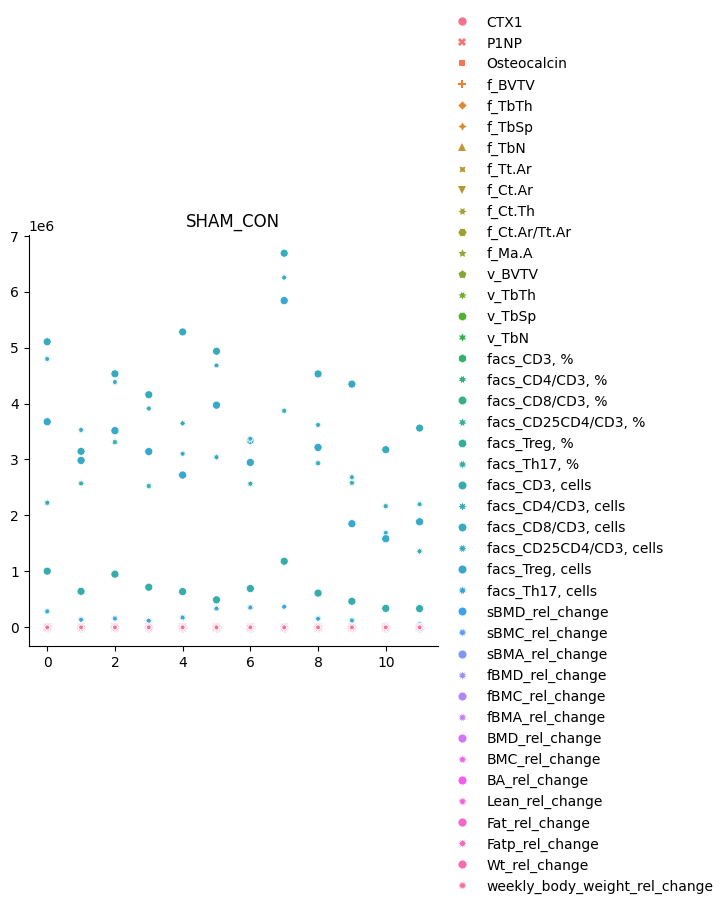

In [206]:
sns.relplot(data=sham_congrp).set(title='SHAM_CON')


In [143]:
sham_gosgrp=week8_num.loc[week8_num['Groups']=='SHAM_GOS']
sham_gosgrp=sham_gosgrp.drop(sham_gosgrp.columns[cols],axis=1)
sham_gosgrp

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
24   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
25   9.002665  19.738325    47.695974  16.464109  0.070362  0.239621   
26  10.073351  21.972422    29.413434  18.732723  0.070731  0.220157   
27   8.344238  19.126278    10.770843  13.887900  0.068616  0.243989   
28   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
29   7.780039  15.668973     6.226505  12.096842  0.067774  0.256677   
30   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
31  11.996064  17.231206    33.849317  13.036060  0.071880  0.264899   
32   8.060115  16.931919     0.000000  16.546230  0.077128  0.255090   
33  10.024194  18.111352    38.305989   9.458395  0.064471  0.289839   
34  15.364816  21.828643    25.604849  16.111516  0.073198  0.257288   
35   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
36   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  \
24  0.000000  0.000000  0.000000  0.000000  ...         0.113636   
25  2.339899  1.897856  1.023807  0.252074  ...         0.000000   
26  2.648435  1.740114  0.972060  0.251595  ...         0.166667   
27  2.023990  1.707699  0.921124  0.242849  ...         0.068182   
28  0.000000  0.000000  0.000000  0.000000  ...         0.111111   
29  1.784871  1.911607  1.014005  0.247713  ...         0.062500   
30  0.000000  0.000000  0.000000  0.000000  ...         0.139535   
31  1.813599  1.934518  1.050489  0.257538  ...        -0.021277   
32  2.145308  1.673733  0.963746  0.259832  ...        -0.020833   
33  1.467074  1.884246  0.971162  0.238225  ...         0.021277   
34  2.201086  1.925427  1.088589  0.269446  ...        -0.078431   
35  0.000000  0.000000  0.000000  0.000000  ...         0.081633   
36  0.000000  0.000000  0.000000  0.000000  ...         0.000000   

    BMD_rel_change  BMC_rel_change  BA_rel_change  Lean_rel_change  \
24        0.075506        0.261614       0.173971         0.163743   
25        0.099448        0.130152       0.025882         0.091429   
26        0.060109        0.176755       0.111851         0.113208   
27        0.118217        0.230769       0.101370         0.100629   
28        0.089127        0.119910       0.026650         0.119318   
29        0.094518        0.186636       0.084146         0.087719   
30        0.154150        0.085919      -0.059179         0.193939   
31        0.102612        0.213429       0.102960         0.114650   
32        0.114662        0.107383      -0.022248         0.000000   
33        0.136095        0.196850       0.054594         0.042424   
34        0.139706        0.110883      -0.025670         0.238372   
35        0.109541        0.209150       0.088779         0.035897   
36        0.108456        0.129930       0.020228         0.134146   

    Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
24        0.282051         0.069519       0.182203   
25        0.230769         0.100000       0.129464   
26        0.038462        -0.063830       0.095238   
27        0.000000        -0.074324       0.065728   
28        0.966667         0.604167       0.230435   
29        0.208333         0.089431       0.085202   
30        1.062500         0.593407       0.222222   
31        0.200000         0.071429       0.108374   
32        0.722222         0.584270       0.043290   
33        0.375000         0.257812       0.074074   
34        1.611111         0.925532       0.321267   
35        0.300000         0.192593       0.071429   
36        0.761905         0.443478       0.184834   

    weekly_body_weight_rel_change    Groups  
24                       0.313901  SHAM_GOS  
25                       0.258537  SHAM_GOS  
26                       0.156250  SHAM_GOS  
27                       0.153061  SHAM_GOS  
28                       0.205761  SHAM_GOS  
29                       0.179245

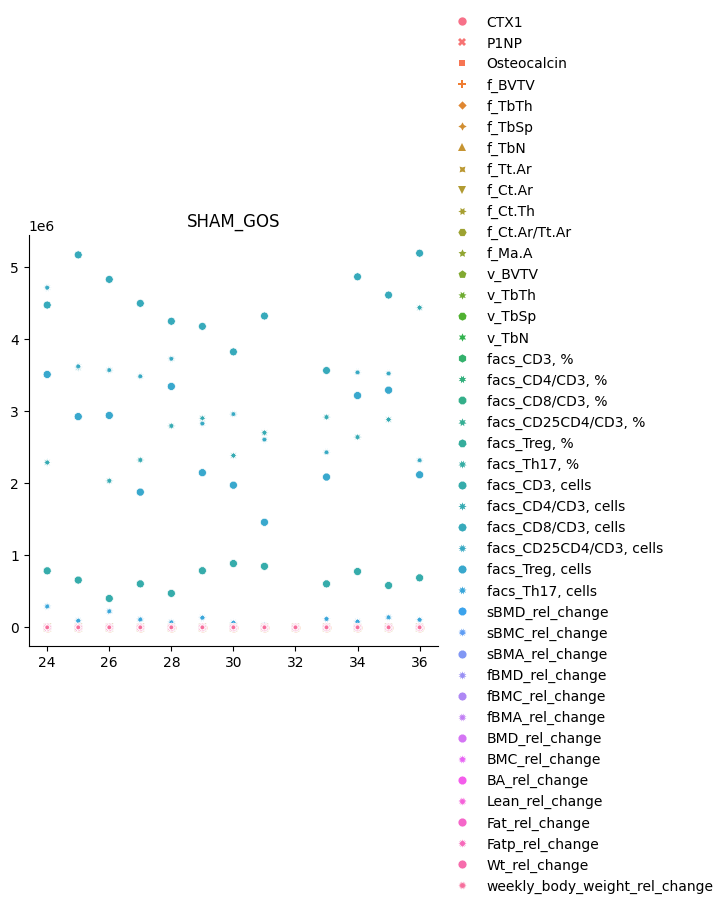

In [205]:
sns.relplot(data=sham_gosgrp).set(title='SHAM_GOS')

In [145]:
ovx_congrp=week8_num.loc[week8_num['Groups']=='OVX_CON']
ovx_congrp=ovx_congrp.drop(ovx_congrp.columns[cols],axis=1)
ovx_congrp

CTX1       P1NP  Osteocalcin    f_BVTV    f_TbTh    f_TbSp     f_TbN  \
12  11.306601  24.451635    31.284779  6.416905  0.053910  0.308359  1.190309   
13  13.405773  29.223103     0.000000  6.396768  0.056016  0.313107  1.141954   
14  12.671102  30.053372    72.189993  5.391055  0.053981  0.307243  0.998697   
15   0.000000   0.000000     0.000000  6.841239  0.053889  0.293742  1.269501   
16  20.403581  30.727307    76.750690  9.772944  0.055007  0.263181  1.776662   
17  11.463753  22.879739    10.770843  6.176383  0.056145  0.299415  1.100080   
18  12.321855  19.126278    54.242681  6.945548  0.054754  0.298015  1.268503   
19   0.000000   0.000000     0.000000  0.000000  0.000000  0.000000  0.000000   
20   0.000000   0.000000     0.000000  0.000000  0.000000  0.000000  0.000000   
21   0.000000   0.000000     0.000000  0.000000  0.000000  0.000000  0.000000   
22  17.571660  19.483802    68.110899  0.000000  0.000000  0.000000  0.000000   
23  14.910253  24.900145    24.827034  8.411803  0.054967  0.284869  1.530339   

     f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  BMD_rel_change  \
12  1.798385  0.895786  0.226794  ...         0.041667        0.029412   
13  1.925950  0.938506  0.228360  ...         0.063830        0.028463   
14  1.798585  0.897306  0.225269  ...         0.116279        0.045455   
15  1.884730  0.978266  0.240850  ...         0.136364        0.077652   
16  1.739921  0.939931  0.246484  ...         0.020408        0.054104   
17  1.852404  0.914205  0.226435  ...         0.085106        0.078431   
18  1.921019  0.968776  0.235856  ...         0.065217       -0.020833   
19  0.000000  0.000000  0.000000  ...         0.000000        0.012727   
20  0.000000  0.000000  0.000000  ...         0.040816        0.059273   
21  0.000000  0.000000  0.000000  ...         0.181818        0.056285   
22  0.000000  0.000000  0.000000  ...         0.111111        0.055344   
23  1.829043  0.958408  0.235939  ...         0.000000        0.054369   

    BMC_rel_change  BA_rel_change  Lean_rel_change  Fat_rel_change  \
12        0.182278       0.149871         0.020942        2.208333   
13        0.057971       0.027990         0.127660        1.206897   
14        0.069048       0.020457         0.080645        1.950000   
15        0.063781      -0.012034         0.066667        1.692308   
16        0.051392      -0.004587         0.112994        1.625000   
17        0.041002      -0.037123         0.124260        1.187500   
18       -0.006912       0.014616         0.230769        0.650000   
19       -0.040080      -0.052922         0.239521        1.400000   
20        0.061966       0.001117         0.100559        0.857143   
21        0.064220       0.006112         0.028249        0.523810   
22        0.092857       0.037500         0.144654       -0.038462   
23        0.049505      -0.006369         0.184049        1.555556   

    Fatp_rel_change  Wt_rel_change  weekly_body_weight_rel_change   Groups  
12         1.572727       0.235537                       0.460396  OVX_CON  
13         0.744361       0.252066                       0.421296  OVX_CON  
14         1.326531       0.225532                       0.404878  OVX_CON  
15         1.181034       0.236000                       0.363636  OVX_CON  
16         1.134146       0.223744                       0.363636  OVX_CON  
17         0.730337       0.172093                       0.297030  OVX_CON  
18         0.321429       0.247525                       0.300493  OVX_CON  
19         0.795181       0.298578                       0.263393  OVX_CON  
20         0.575342       0.155251                       0.142222  OVX_CON  
21         0.388889       0.085586                       0.192488  OVX_CON  
22        -0.141844       0.103286                       0.205000  OVX_CON  
23         0.939394       0.281553                       0.425641  OVX_CON  

[12 rows x 43 columns]

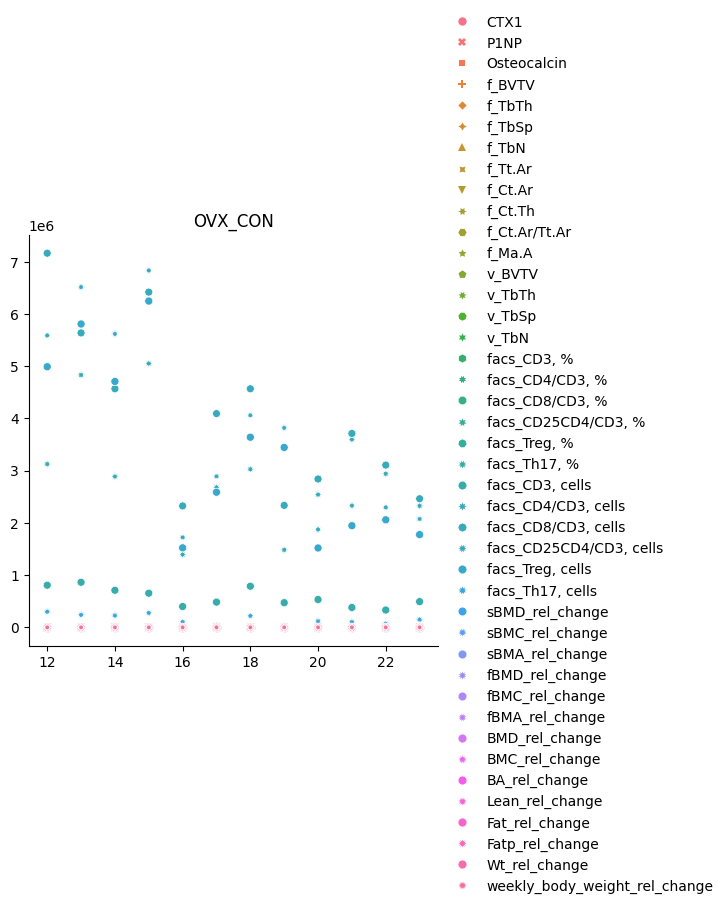

In [204]:
sns.relplot(data=ovx_congrp).set(title='OVX_CON')

In [147]:
ovx_gosgrp=week8_num.loc[week8_num['Groups']=='OVX_GOS']
ovx_gosgrp=ovx_gosgrp.drop(ovx_gosgrp.columns[cols],axis=1)
ovx_gosgrp

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
37   8.045274  18.483049    24.249051   9.643020  0.057305  0.273860   
38   8.254073  20.870799    46.437761   8.389128  0.058152  0.296282   
39   7.634227  19.610620    46.188099   7.281459  0.059950  0.317209   
40   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
41   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
42   9.747833  11.944576    32.770993  11.969587  0.060739  0.261311   
43   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
44   9.065028  12.047518    24.633863  10.822638  0.061056  0.275020   
45  11.657408  18.862713    31.706645   9.319933  0.056694  0.271575   
46   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
47   8.632497  14.110485    55.331110  11.422694  0.064239  0.260071   
48   7.217470  12.081991    36.944498   6.864526  0.064875  0.305008   
49   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  \
37  1.682744  1.987211  0.954348  0.226153  ...         0.020408   
38  1.442632  1.936775  0.946145  0.228769  ...        -0.080000   
39  1.214584  1.823306  0.931187  0.232706  ...         0.021739   
40  0.000000  0.000000  0.000000  0.000000  ...        -0.020000   
41  0.000000  0.000000  0.000000  0.000000  ...         0.111111   
42  1.970656  1.906551  0.970996  0.238682  ...         0.139535   
43  0.000000  0.000000  0.000000  0.000000  ...         0.022222   
44  1.772572  1.806473  0.954756  0.241733  ...         0.021739   
45  1.643897  1.849686  0.976600  0.242006  ...         0.133333   
46  0.000000  0.000000  0.000000  0.000000  ...         0.102041   
47  1.778148  1.909573  1.013075  0.248679  ...         0.044444   
48  1.058120  1.879609  0.939797  0.231850  ...        -0.157895   
49  0.000000  0.000000  0.000000  0.000000  ...         0.021739   

    BMD_rel_change  BMC_rel_change  BA_rel_change  Lean_rel_change  \
37       -0.009311       -0.024070      -0.015276         0.209945   
38        0.005725        0.023605       0.019123         0.163842   
39        0.080550        0.163366       0.076826         0.159091   
40        0.049524        0.039501      -0.009825         0.186170   
41        0.053950        0.032397      -0.029148         0.189944   
42        0.061303        0.086560       0.025000         0.190751   
43        0.044146        0.028235      -0.015912         0.174699   
44        0.127745        0.105634      -0.018824         0.189944   
45        0.077071        0.123487       0.043970         0.133333   
46        0.131827        0.077586      -0.048055         0.213198   
47        0.134875        0.063927      -0.060498         0.170213   
48        0.047801       -0.030568      -0.085616         0.285714   
49        0.110694        0.154378       0.040541         0.136126   

    Fat_rel_change  Fatp_rel_change  Wt_rel_change  \
37        2.142857         1.242718       0.336207   
38        2.411765         1.558140       0.299107   
39        2.090909         1.302752       0.330357   
40        3.555556         2.091954       0.393305   
41        1.684211         0.979592       0.278761   
42        1.571429         0.934579       0.300000   
43        1.294118         0.765957       0.238095   
44        1.842105         1.051020       0.295154   
45        1.000000         0.627907       0.208511   
46        2.478261         1.400000       0.410569   
47        1.304348         0.788991       0.256303   
48        3.384615         1.828947       0.447761   
49        1.695652         1.094340       0.269710   

    weekly_body_weight_rel_change   Groups  
37                       0.409910  OVX_GOS  
38                       0.418269  OVX_GOS  
39                       0.519802  OVX_GOS  
40                       0.563636  OVX_GOS  
41                       0.215447  OVX_GOS  
42                       0.375610  OVX_

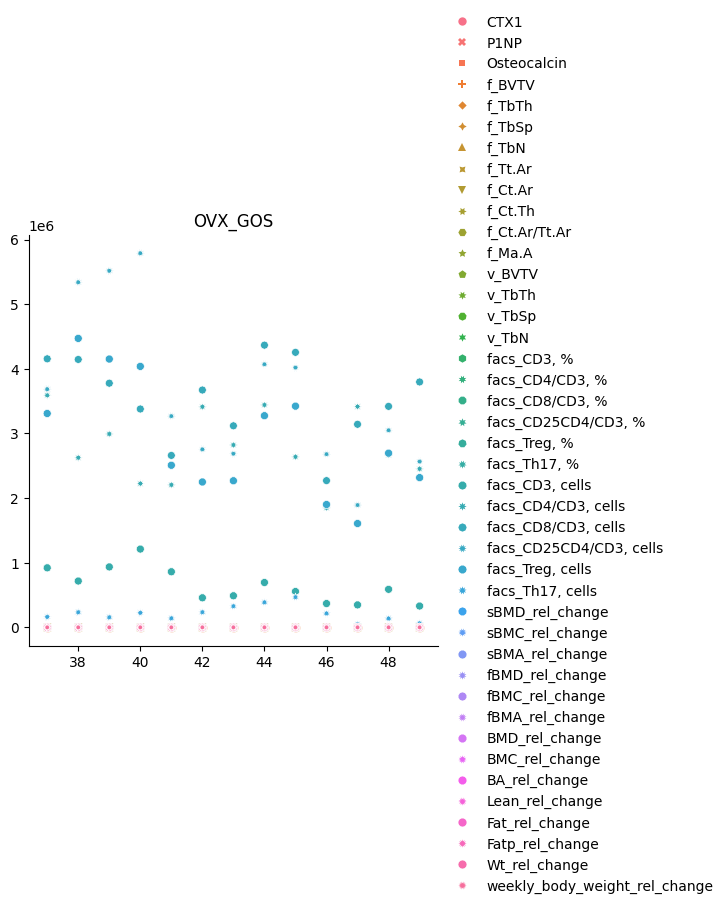

In [203]:
sns.relplot(data=ovx_gosgrp).set(title='OVX_GOS')

# PCA using full week 8 data set
too many labels, hard to read

In [149]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

week8_scaled = scaler.fit_transform(week8_num.drop(columns=['Groups']))

pcaweek8=PCA()
pcaweek8.fit(week8_scaled)

PCA()

In [150]:
week8_scaled

array([[ 0.33715302,  1.7910136 ,  0.97670671, ...,  1.        ,
         1.040833  , -1.040833  ],
       [ 0.6815539 ,  1.03016956,  0.18642468, ...,  1.        ,
         1.040833  , -1.040833  ],
       [ 0.34530528,  0.48776587, -0.16451588, ...,  1.        ,
         1.040833  , -1.040833  ],
       ...,
       [ 0.32901949,  0.05406794,  1.52452923, ..., -1.        ,
        -0.96076892,  0.96076892],
       [ 0.07826681, -0.12903733,  0.70758646, ..., -1.        ,
        -0.96076892,  0.96076892],
       [-1.20071914, -1.21963795, -0.93390906, ..., -1.        ,
        -0.96076892,  0.96076892]])

In [151]:
pcaweek8.components_

array([[ 1.84394786e-01,  1.84108257e-01,  1.33579902e-01, ...,
         2.16761229e-02,  7.85016920e-03, -7.85016920e-03],
       [ 3.89420920e-02,  3.00879638e-02,  5.64232339e-02, ...,
        -2.85750294e-01,  3.63143331e-02, -3.63143331e-02],
       [ 1.14653577e-02,  9.93234331e-02,  3.92045905e-03, ...,
         5.87036779e-02,  2.60924922e-01, -2.60924922e-01],
       ...,
       [ 0.00000000e+00,  3.05178198e-16, -2.10334914e-16, ...,
        -1.90285524e-01,  4.73368018e-01,  9.01048516e-02],
       [ 0.00000000e+00, -4.27192742e-16,  2.37900163e-16, ...,
         1.57707800e-01, -1.53564413e-02,  1.86841430e-02],
       [ 0.00000000e+00, -2.14021509e-16,  1.29739718e-16, ...,
        -5.11577481e-01,  2.28992467e-01,  6.16758096e-01]])

In [152]:
pcaweek8.components_.shape

(50, 50)

In [153]:
scores = pcaweek8.transform(week8_scaled)
scores

array([[-3.71923180e+00, -1.45819517e+00,  4.90267855e+00, ...,
         1.16772389e-16, -7.65706173e-17,  2.40483694e-16],
       [-4.12368858e+00, -2.55492907e-01,  2.07679652e+00, ...,
         2.27794692e-16, -1.32081769e-16,  2.40483694e-16],
       [ 2.77357749e+00, -2.33384193e+00,  2.47865291e+00, ...,
         2.27794692e-16, -5.76170978e-16,  1.84390890e-17],
       ...,
       [ 2.75673819e+00,  1.10122736e+00, -4.14904215e+00, ...,
         4.78615987e-17, -5.45952426e-16, -1.55973537e-16],
       [ 1.68131548e+00,  6.21060757e+00, -3.60249098e+00, ...,
        -2.85205309e-16, -2.96152245e-16, -6.00062747e-16],
       [-5.06128000e+00,  2.22786489e-01, -2.52981628e+00, ...,
         1.58883901e-16,  3.69981570e-16, -1.55973537e-16]])

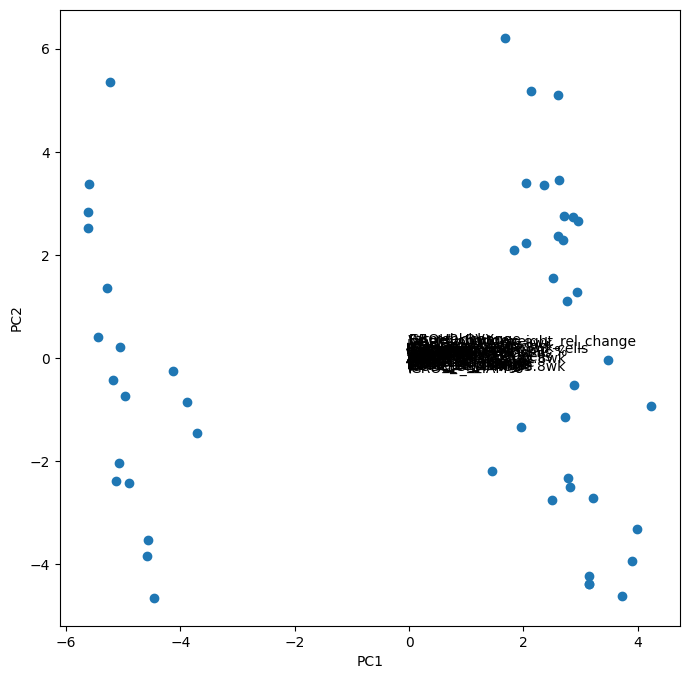

In [154]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))


for k in range(pcaweek8.components_.shape[1]):
    ax.arrow(0, 0, pcaweek8.components_[i,k], pcaweek8.components_[j,k])
    ax.text(pcaweek8.components_[i,k],
            pcaweek8.components_[j,k],
            week8_num.columns[k])


Text(0.5, 1.0, 'Week 8 Scaled')

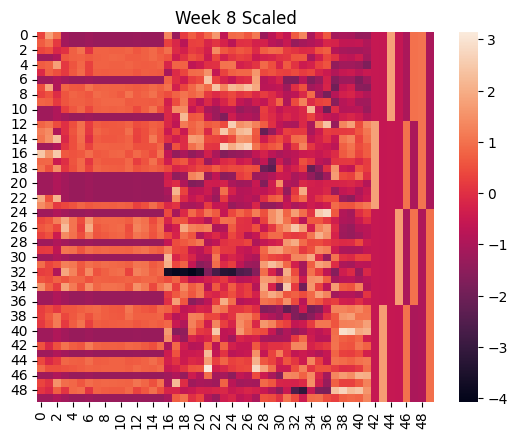

In [201]:
sns.heatmap(week8_scaled).set_title('Week 8 Scaled')

# PCA with Bone Biomarkers

In [156]:
cols=[0,1,2]
bone_data=week8_num.iloc[:,cols]
bone_data

CTX1       P1NP  Osteocalcin
0    8.678396  33.352875    43.001483
1   10.621891  24.924023    25.214914
2    8.724400  18.915117    17.316432
3    0.000000   0.000000     0.000000
4   10.588232  22.263223    60.376019
5    6.193446  21.564442    31.918405
6    0.000000   0.000000     0.000000
7    9.363910  33.984705     0.000000
8    8.359306  19.519946    19.608305
9   11.306601  21.584637    25.214914
10   0.000000   0.000000     0.000000
11   0.000000   0.000000     0.000000
12  11.306601  24.451635    31.284779
13  13.405773  29.223103     0.000000
14  12.671102  30.053372    72.189993
15   0.000000   0.000000     0.000000
16  20.403581  30.727307    76.750690
17  11.463753  22.879739    10.770843
18  12.321855  19.126278    54.242681
19   0.000000   0.000000     0.000000
20   0.000000   0.000000     0.000000
21   0.000000   0.000000     0.000000
22  17.571660  19.483802    68.110899
23  14.910253  24.900145    24.827034
24   0.000000   0.000000     0.000000
25   9.002665  19.738325    47.695974
26  10.073351  21.972422    29.413434
27   8.344238  19.126278    10.770843
28   0.000000   0.000000     0.000000
29   7.780039  15.668973     6.226505
30   0.000000   0.000000     0.000000
31  11.996064  17.231206    33.849317
32   8.060115  16.931919     0.000000
33  10.024194  18.111352    38.305989
34  15.364816  21.828643    25.604849
35   0.000000   0.000000     0.000000
36   0.000000   0.000000     0.000000
37   8.045274  18.483049    24.249051
38   8.254073  20.870799    46.437761
39   7.634227  19.610620    46.188099
40   0.000000   0.000000     0.000000
41   0.000000   0.000000     0.000000
42   9.747833  11.944576    32.770993
43   0.000000   0.000000     0.000000
44   9.065028  12.047518    24.633863
45  11.657408  18.862713    31.706645
46   0.000000   0.000000     0.000000
47   8.632497  14.110485    55.331110
48   7.217470  12.081991    36.944498
49   0.000000   0.000000     0.000000

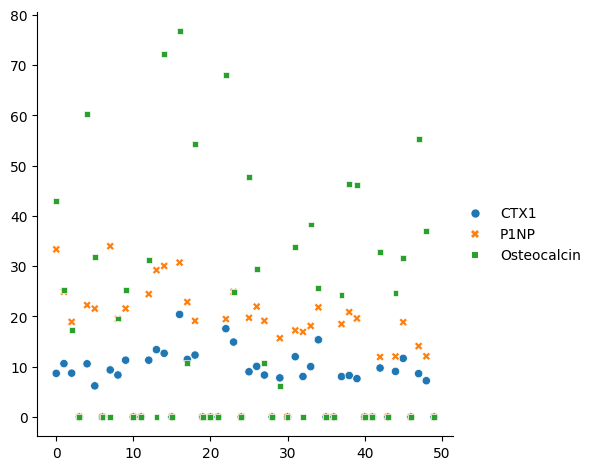

In [157]:
sns.relplot(data=bone_data)

In [158]:
scaler=StandardScaler(with_std=True,
                      with_mean=True)

bd_scaled=scaler.fit_transform(bone_data)
pcabd=PCA()
pcabd.fit(bd_scaled)
scores=pcabd.transform(bd_scaled)
scores

array([[ 1.77870873, -0.22219059, -1.03062333],
       [ 1.11292525, -0.54685627, -0.15121111],
       [ 0.40293991, -0.4709525 , -0.00774124],
       [-1.94358993,  0.15424988,  0.00971861],
       [ 1.8200845 ,  0.85941011, -0.29512058],
       [ 0.62492316,  0.03680017, -0.61780613],
       [-1.94358993,  0.15424988,  0.00971861],
       [ 0.84485803, -1.84347801, -0.62097439],
       [ 0.45115913, -0.40155733, -0.10969826],
       [ 1.01052325, -0.41582584,  0.12794882],
       [-1.94358993,  0.15424988,  0.00971861],
       [-1.94358993,  0.15424988,  0.00971861],
       [ 1.30814942, -0.33155525, -0.08187421],
       [ 1.02662565, -1.7813205 ,  0.19194964],
       [ 2.73829616,  0.8335708 , -0.54504572],
       [-1.94358993,  0.15424988,  0.00971861],
       [ 3.71087122,  0.65282881,  0.42643536],
       [ 0.74597528, -1.00895793,  0.19517899],
       [ 1.69209343,  0.71516755,  0.16491639],
       [-1.94358993,  0.15424988,  0.00971861],
       [-1.94358993,  0.15424988,  0.009

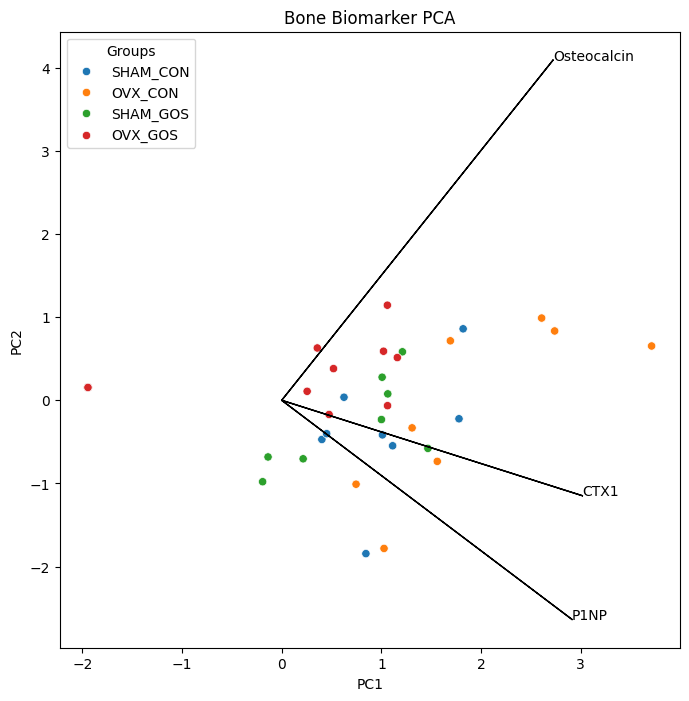

In [159]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('Bone Biomarker PCA')

for k in range(pcabd.components_.shape[1]):
    ax.arrow(0, 0, pcabd.components_[i,k]*5, pcabd.components_[j,k]*5, color='k')
    ax.text(pcabd.components_[i,k]*5,
            pcabd.components_[j,k]*5,
            bone_data.columns[k])

In [160]:
pcabd.explained_variance_ratio_

array([0.847269  , 0.12103561, 0.03169539])

# PCA with femur data

In [161]:
cols=[3,4,5,6,7,8,9,10,11]
femur_data=week8_num.iloc[:,cols]
femur_data

f_BVTV    f_TbTh    f_TbSp     f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  \
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    6.533580  0.060940  0.314338  1.072141  1.888325  0.973667  0.240256   
3    9.561600  0.061400  0.282400  1.557200  1.841247  0.981967  0.248929   
4    7.097617  0.056343  0.293051  1.259711  1.879604  0.972052  0.238803   
5    7.297900  0.058200  0.301600  1.253700  1.813841  0.933756  0.238065   
6    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   10.729665  0.058021  0.259600  1.849272  1.870477  0.990304  0.244555   
8    9.479761  0.063193  0.277121  1.500129  2.007753  1.001075  0.241719   
9    9.502290  0.061055  0.279668  1.556346  1.864078  1.018199  0.254409   
10   7.546084  0.056821  0.291818  1.328040  1.862393  0.982325  0.240240   
11   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12   6.416905  0.053910  0.308359  1.190309  1.798385  0.895786  0.226794   
13   6.396768  0.056016  0.313107  1.141954  1.925950  0.938506  0.228360   
14   5.391055  0.053981  0.307243  0.998697  1.798585  0.897306  0.225269   
15   6.841239  0.053889  0.293742  1.269501  1.884730  0.978266  0.240850   
16   9.772944  0.055007  0.263181  1.776662  1.739921  0.939931  0.246484   
17   6.176383  0.056145  0.299415  1.100080  1.852404  0.914205  0.226435   
18   6.945548  0.054754  0.298015  1.268503  1.921019  0.968776  0.235856   
19   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23   8.411803  0.054967  0.284869  1.530339  1.829043  0.958408  0.235939   
24   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25  16.464109  0.070362  0.239621  2.339899  1.897856  1.023807  0.252074   
26  18.732723  0.070731  0.220157  2.648435  1.740114  0.972060  0.251595   
27  13.887900  0.068616  0.243989  2.023990  1.707699  0.921124  0.242849   
28   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29  12.096842  0.067774  0.256677  1.784871  1.911607  1.014005  0.247713   
30   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
31  13.036060  0.071880  0.264899  1.813599  1.934518  1.050489  0.257538   
32  16.546230  0.077128  0.255090  2.145308  1.673733  0.963746  0.259832   
33   9.458395  0.064471  0.289839  1.467074  1.884246  0.971162  0.238225   
34  16.111516  0.073198  0.257288  2.201086  1.925427  1.088589  0.269446   
35   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
36   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37   9.643020  0.057305  0.273860  1.682744  1.987211  0.954348  0.226153   
38   8.389128  0.058152  0.296282  1.442632  1.936775  0.946145  0.228769   
39   7.281459  0.059950  0.317209  1.214584  1.823306  0.931187  0.232706   
40   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
41   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
42  11.969587  0.060739  0.261311  1.970656  1.906551  0.970996  0.238682   
43   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
44  10.822638  0.061056  0.275020  1.772572  1.806473  0.954756  0.241733   
45   9.319933  0.056694  0.271575  1.643897  1.849686  0.976600  0.242006   
46   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
47  11.422694  0.064239  0.260071  1.778148  1.909573  1.013075  0.248679   
48   6.864526  0.064875  0.305008  1.058120  1.879609  0.939797  0.231850   
49   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

    f_Ct.Ar/Tt.Ar    f_Ma.A  
0        0.000000  0.000000  
1        0.000000  

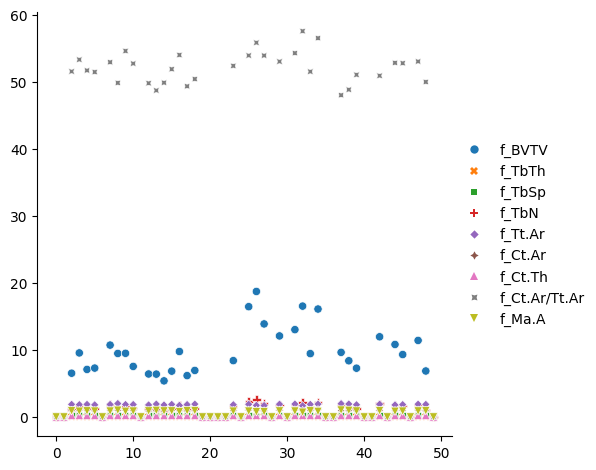

In [162]:
sns.relplot(data=femur_data)

In [163]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

fd_scaled = scaler.fit_transform(femur_data)
pcafd=PCA()
pcafd.fit(fd_scaled)

PCA()

In [164]:
scores=pcafd.transform(fd_scaled)
scores

array([[-3.89034254e+00,  8.06791128e-02,  2.88238199e-04,
        -2.77224969e-03, -1.53235508e-03, -5.19963799e-04,
        -1.75014729e-04,  4.90368587e-05,  8.46687568e-17],
       [-3.89034254e+00,  8.06791128e-02,  2.88238199e-04,
        -2.77224969e-03, -1.53235508e-03, -5.19963799e-04,
        -1.75014729e-04,  4.90368587e-05,  8.46687568e-17],
       [ 1.89663411e+00, -8.78693636e-01,  2.08934469e-01,
        -4.36259170e-02, -2.48746584e-02, -1.73914906e-02,
        -1.19558380e-02,  1.18908669e-03, -2.09722977e-17],
       [ 2.18224844e+00, -9.16968543e-02,  7.55493297e-02,
         9.15552869e-02, -3.32407557e-02,  7.27066850e-03,
        -1.12258003e-02,  1.97021979e-02, -6.58987595e-17],
       [ 1.88636892e+00, -6.38835893e-01,  9.72770152e-03,
         6.46109796e-02, -6.04074148e-02, -6.90140979e-03,
         1.60066343e-02, -7.11325382e-03, -8.50192294e-17],
       [ 1.85800038e+00, -5.94328778e-01,  1.16233446e-01,
         5.71496272e-02,  4.10460902e-02,  1.495796

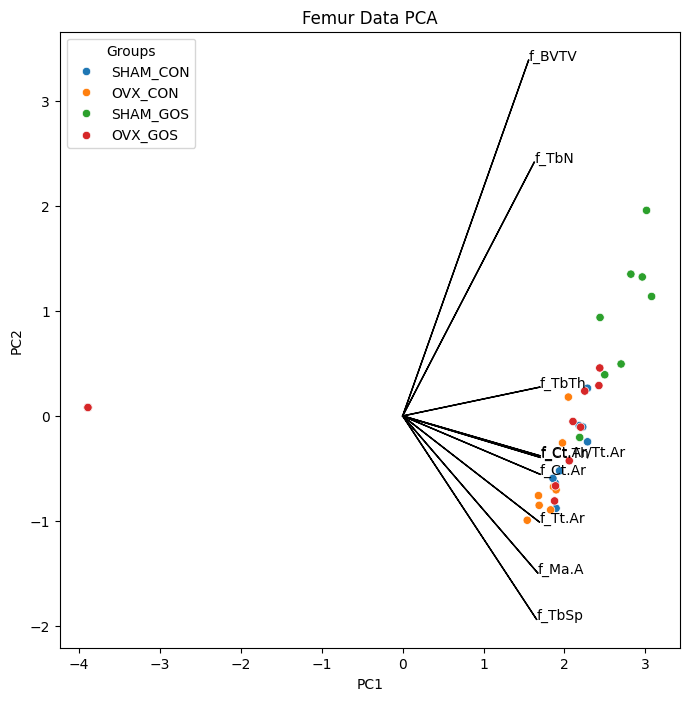

In [165]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('Femur Data PCA')
for k in range(pcafd.components_.shape[1]):
    ax.arrow(0, 0, pcafd.components_[i,k]*5, pcafd.components_[j,k]*5, color='k')
    ax.text(pcafd.components_[i,k]*5,
            pcafd.components_[j,k]*5,
            femur_data.columns[k])

In [166]:
pcafd.explained_variance_ratio_

array([9.56828043e-01, 3.97029685e-02, 1.84508595e-03, 1.13425150e-03,
       3.81096864e-04, 7.88777659e-05, 1.88627840e-05, 1.08132454e-05,
       1.07381858e-33])

# PCA with vertebra data

In [167]:
cols=[12,13,14,15]
vert_data=week8_num.iloc[:,cols]
vert_data

v_BVTV    v_TbTh    v_TbSp     v_TbN
0    0.000000  0.000000  0.000000  0.000000
1    0.000000  0.000000  0.000000  0.000000
2   30.928378  0.076803  0.223905  4.026996
3   32.190367  0.076589  0.225093  4.203004
4   32.666919  0.074202  0.206039  4.402413
5   30.939512  0.075278  0.203662  4.110016
6    0.000000  0.000000  0.000000  0.000000
7   31.847096  0.075052  0.225071  4.243309
8   32.116595  0.078684  0.234937  4.081744
9   31.896445  0.074529  0.201188  4.279739
10  27.328875  0.074866  0.238357  3.650395
11   0.000000  0.000000  0.000000  0.000000
12  28.279323  0.069294  0.210670  4.081068
13  26.197085  0.067121  0.214540  3.902957
14  25.626672  0.066588  0.250663  3.848536
15  29.493818  0.067660  0.188371  4.359116
16  35.249103  0.072885  0.179111  4.836259
17  24.727450  0.068884  0.235314  3.589741
18  29.848998  0.073452  0.213370  4.063765
19   0.000000  0.000000  0.000000  0.000000
20   0.000000  0.000000  0.000000  0.000000
21   0.000000  0.000000  0.000000  0.000000
22   0.000000  0.000000  0.000000  0.000000
23  25.603915  0.067172  0.228782  3.811698
24   0.000000  0.000000  0.000000  0.000000
25  40.025134  0.086329  0.178454  4.636342
26  41.767585  0.087576  0.196152  4.769317
27  38.149921  0.082289  0.189300  4.636094
28   0.000000  0.000000  0.000000  0.000000
29  36.388199  0.087263  0.214151  4.169926
30   0.000000  0.000000  0.000000  0.000000
31  38.615857  0.087139  0.201862  4.431518
32  41.130834  0.088779  0.210202  4.632954
33  33.014519  0.081040  0.221728  4.073831
34  45.196397  0.090787  0.175520  4.978287
35   0.000000  0.000000  0.000000  0.000000
36   0.000000  0.000000  0.000000  0.000000
37  32.492108  0.071506  0.186253  4.543982
38  33.225739  0.076254  0.210476  4.357245
39  30.688920  0.074417  0.211014  4.123887
40   0.000000  0.000000  0.000000  0.000000
41   0.000000  0.000000  0.000000  0.000000
42  33.793181  0.072956  0.184131  4.632022
43   0.000000  0.000000  0.000000  0.000000
44  32.052210  0.077530  0.230440  4.134155
45  35.246090  0.077514  0.209533  4.547082
46   0.000000  0.000000  0.000000  0.000000
47  38.017579  0.079724  0.185177  4.768638
48  26.310220  0.070648  0.233636  3.724135
49   0.000000  0.000000  0.000000  0.000000

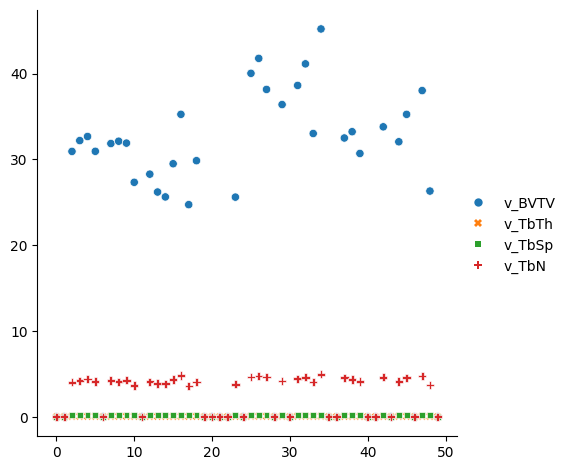

In [168]:
sns.relplot(data=vert_data)

In [169]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

vt_scaled = scaler.fit_transform(vert_data)
pcavt=PCA()
pcavt.fit(vt_scaled)
scores=pcavt.transform(vt_scaled)
scores

array([[-2.62469615e+00, -3.02807902e-02, -6.26632813e-03,
        -1.10139746e-03],
       [-2.62469615e+00, -3.02807902e-02, -6.26632813e-03,
        -1.10139746e-03],
       [ 1.42895832e+00,  2.13470285e-01, -7.17598812e-02,
         9.53860346e-03],
       [ 1.51333289e+00,  1.65953856e-01, -1.98239065e-02,
        -2.71303788e-02],
       [ 1.45193265e+00, -1.39794306e-02,  9.32981151e-02,
        -1.11936862e-02],
       [ 1.33093082e+00,  4.77736774e-02, -8.59883756e-03,
         5.03004071e-02],
       [-2.62469615e+00, -3.02807902e-02, -6.26632813e-03,
        -1.10139746e-03],
       [ 1.49162871e+00,  1.77165463e-01,  2.27699941e-02,
        -3.82474334e-02],
       [ 1.55760613e+00,  2.52832890e-01, -1.00104001e-01,
        -2.78635042e-02],
       [ 1.37943786e+00, -1.70123006e-02,  5.48025266e-02,
         2.55672773e-02],
       [ 1.27046664e+00,  4.86047852e-01, -1.43530996e-01,
         2.68156655e-02],
       [-2.62469615e+00, -3.02807902e-02, -6.26632813e-03,
      

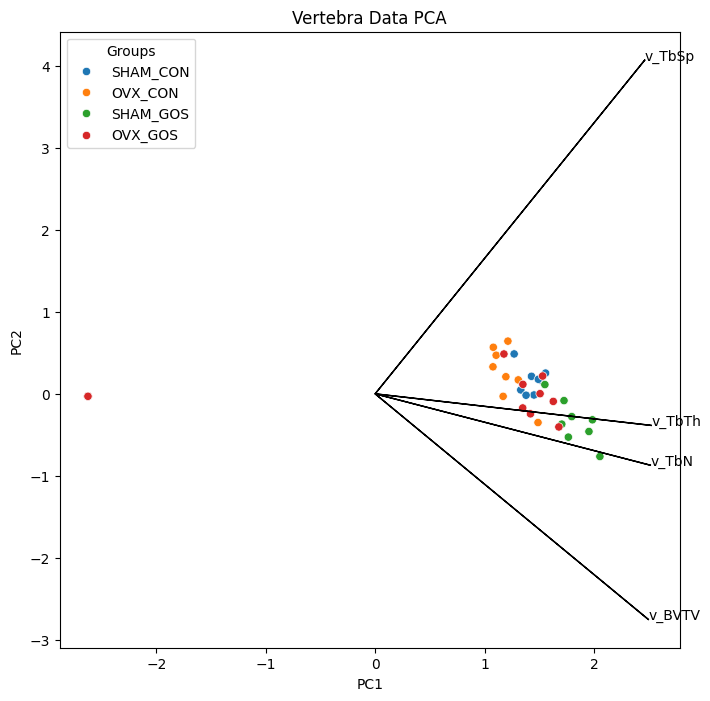

In [170]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('Vertebra Data PCA')
for k in range(pcavt.components_.shape[1]):
    ax.arrow(0, 0, pcavt.components_[i,k]*5, pcavt.components_[j,k]*5, color='k')
    ax.text(pcavt.components_[i,k]*5,
            pcavt.components_[j,k]*5,
            vert_data.columns[k])

In [171]:
pcavt.explained_variance_ratio_

array([9.79424622e-01, 1.82193867e-02, 2.20937709e-03, 1.46614495e-04])

# PCA with FACS Data

In [172]:
cols=[16,17,18,19,20,21,22,23,24,25,26,27]
cyt_data=week8_num.iloc[:,cols]
cyt_data

facs_CD3, %  facs_CD4/CD3, %  facs_CD8/CD3, %  facs_CD25CD4/CD3, %  \
0          5.55             12.3             28.2                 26.5   
1          4.38             17.5             21.4                 24.0   
2          5.14             17.9             24.5                 23.7   
3          4.66             16.4             27.0                 25.4   
4          3.87             22.1             32.0                 18.8   
5          2.91             18.0             29.2                 27.7   
6          4.92             18.2             23.7                 23.9   
7          5.16             16.9             29.2                 27.3   
8          4.57             21.9             33.8                 27.0   
9          3.70             20.5             34.5                 21.3   
10         3.90             24.9             36.5                 19.4   
11         3.94             16.0             41.9                 25.9   
12         3.90             15.1             34.6                 27.0   
13         3.54             19.8             23.1                 26.7   
14         4.06             16.5             26.1                 32.1   
15         2.68             20.7             26.3                 28.0   
16         3.38             11.8             19.7                 14.6   
17         3.66             20.3             31.0                 21.9   
18         4.50             17.3             26.1                 23.2   
19         3.66             11.5             18.1                 29.6   
20         3.75             17.9             20.0                 13.2   
21         2.97             28.1             29.0                 18.2   
22         2.79             24.7             26.1                 19.3   
23         3.94             18.6             19.7                 16.6   
24         4.56             13.3             26.0                 27.4   
25         3.86             21.2             30.4                 21.3   
26         3.31             16.8             39.9                 29.5   
27         4.47             17.2             33.3                 25.8   
28         3.44             20.4             31.0                 27.2   
29         5.42             20.0             28.8                 19.5   
30         6.46             17.4             27.9                 21.6   
31         6.27             20.0             32.0                 19.3   
32         0.00              0.0              0.0                  0.0   
33         4.57             22.1             27.0                 18.4   
34         5.78             19.7             36.3                 26.4   
35         4.27             21.2             33.9                 25.9   
36         4.09             26.4             30.9                 13.8   
37         4.90             19.1             22.1                 19.6   
38         3.96             14.5             22.9                 29.5   
39         5.00             16.0             20.2                 29.5   
40         5.88             10.8             16.4                 28.1   
41         5.66             14.5             17.5                 21.5   
42         2.99             22.3             24.0                 18.0   
43         3.62             20.9             23.1                 19.9   
44         3.75             18.6             23.6                 22.0   
45         3.53             16.8             27.1                 25.6   
46         2.79             14.0             17.2                 20.3   
47         2.92             28.7             26.4                 15.9   
48         3.82             17.3             22.2                 19.8   
49         2.92             21.7             33.6                 22.7   

    facs_Treg, %  facs_Th17, %  facs_CD3, cells  facs_CD4/CD3, cells  \
0           20.3          1.58        1004550.0            2226300.0   
1           20.3          0.94         643860.0            2572500.0   
2           1

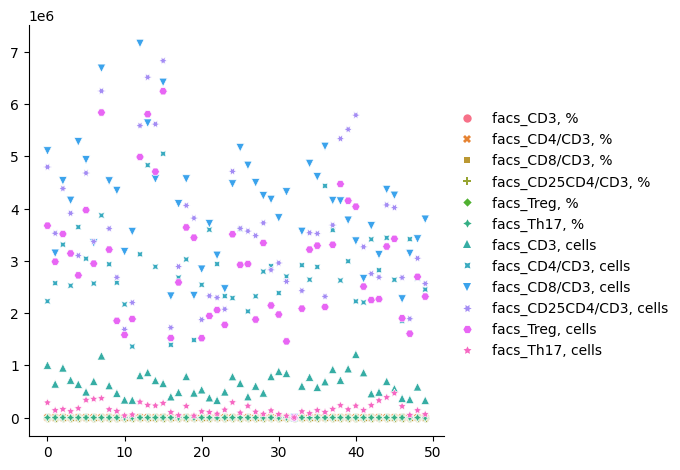

In [173]:
sns.relplot(data=cyt_data)

In [174]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

cyt_scaled = scaler.fit_transform(cyt_data)
pcacyt=PCA()
pcacyt.fit(cyt_scaled)
scores=pcacyt.transform(cyt_scaled)
scores

array([[ 2.25708016e+00, -1.52761362e+00,  1.19417924e+00,
        -2.73213942e-01,  1.13948700e+00,  8.68648621e-01,
         4.02219004e-02, -1.61425005e-01,  1.01835993e-01,
        -3.14056922e-02,  6.96949434e-03,  2.31082594e-02],
       [-2.95700073e-01, -5.64309984e-01,  5.93541327e-01,
         1.92192657e-01, -2.52087822e-01, -8.38313536e-01,
         6.18717060e-02,  1.00972340e-01,  3.31771354e-02,
        -2.73594539e-02,  2.38814405e-02, -1.25679504e-02],
       [ 1.26215184e+00,  3.68036085e-02,  1.27363461e+00,
        -9.48270932e-01, -3.54631616e-01, -5.22393045e-02,
         2.09518818e-03,  1.66024636e-02,  7.48972090e-02,
         1.47170255e-01, -2.32411961e-02,  7.98795864e-03],
       [ 3.90378547e-01, -4.96199110e-02,  1.09106851e+00,
         4.81529141e-01, -1.19863446e-01,  2.44279923e-02,
        -4.79562756e-02,  8.84201325e-02,  6.76183092e-02,
        -1.75394150e-02, -1.98791662e-02,  1.83307680e-03],
       [ 2.11208934e-01,  1.46026943e+00, -7.5764227

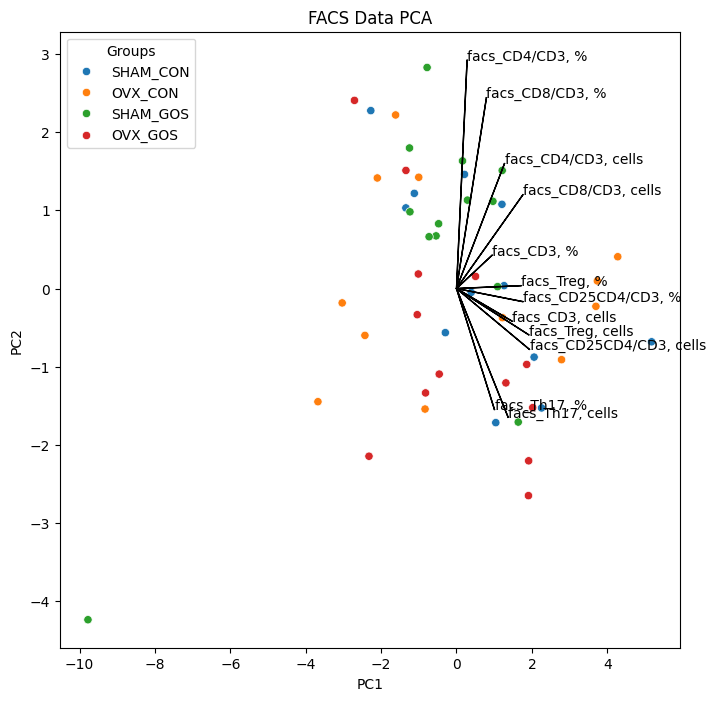

In [175]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('FACS Data PCA')

for k in range(pcacyt.components_.shape[1]):
    ax.arrow(0, 0, pcacyt.components_[i,k]*5, pcacyt.components_[j,k]*5, color='k')
    ax.text(pcacyt.components_[i,k]*5,
            pcacyt.components_[j,k]*5,
            cyt_data.columns[k])

In [176]:
pcacyt.explained_variance_ratio_

array([4.70578035e-01, 1.79022125e-01, 1.28236489e-01, 9.78064237e-02,
       7.93481780e-02, 3.40713908e-02, 6.76205945e-03, 1.85048965e-03,
       9.65467153e-04, 8.94978561e-04, 4.21470668e-04, 4.28935820e-05])

# PCA with weight data

In [177]:
cols=[28,29,30,31,32,33,34,35,36,37,38,39,40,41]
wt_data=week8_num.iloc[:,cols]
wt_data

sBMD_rel_change  sBMC_rel_change  sBMA_rel_change  fBMD_rel_change  \
0         -0.053623        -0.034483         0.000000         0.062500   
1          0.062500        -0.040000        -0.073171         0.064815   
2          0.172956         0.280000         0.102564         0.105797   
3          0.060117         0.074074         0.025000         0.101449   
4          0.191379         0.200000         0.000000         0.132530   
5          0.136876         0.208333         0.051282         0.109827   
6          0.000000         0.000000         0.000000         0.000000   
7          0.006993        -0.030303        -0.042553         0.027064   
8          0.114569         0.100000        -0.023256         0.046154   
9          0.019802         0.103448         0.097561         0.042877   
10         0.117347         0.068966        -0.040816         0.075949   
11         0.110638         0.093750        -0.021739         0.087500   
12         0.170248         0.107143        -0.043478         0.041543   
13        -0.151745        -0.153846        -0.025000         0.110248   
14         0.045113         0.133333         0.066667         0.092683   
15         0.130106         0.222222         0.097561         0.057864   
16         0.062595        -0.031250        -0.081633         0.047552   
17         0.021886        -0.270270        -0.021739         0.029499   
18        -0.137881        -0.342105         0.048780         0.060870   
19        -0.038718        -0.058824        -0.022222         0.066667   
20        -0.098571         0.033333         0.162791         0.044053   
21         0.013216         0.030303         0.020833         0.017442   
22         0.088550         0.230769         0.100000         0.049931   
23        -0.064562        -0.161290        -0.090909         0.062407   
24         0.149630         0.384615         0.210526         0.140200   
25         0.124269         0.384615         0.210526         0.153090   
26         0.032670         0.137931         0.121951         0.183381   
27         0.136296         0.280000         0.108108         0.111601   
28         0.024422         0.031250         0.000000         0.185507   
29         0.188180         0.423077         0.195122         0.161337   
30         0.166927         0.178571         0.046512         0.100709   
31         0.283113         0.541667         0.200000         0.142446   
32         0.196875         0.064516        -0.104167         0.206231   
33         0.279720         0.416667         0.121951         0.181538   
34         0.306250         0.058824        -0.169811         0.237027   
35         0.254464         0.481481         0.175000         0.127005   
36         0.208207         0.280000         0.081081         0.179083   
37        -0.097372        -0.187500        -0.102041        -0.032353   
38         0.016026        -0.068966        -0.106383         0.070000   
39         0.269581         0.347826         0.071429         0.109256   
40         0.141156         0.000000        -0.122449         0.042936   
41        -0.025932        -0.107143        -0.086957         0.039589   
42         0.071313         0.115385         0.023810         0.102857   
43         0.026034         0.166667         0.135135         0.099561   
44         0.158645         0.166667         0.000000         0.126300   
45         0.298812         0.291667        -0.024390         0.069733   
46         0.043027        -0.088235        -0.137255         0.171303   
47         0.191388         0.222222         0.000000         0.080851   
48         0.035836        -0.074074        -0.127660         0.065850   
49         0.152648         0.192308         0.024390         0.154506   

    fBMC_rel_change  fBMA_rel_change  BMD_rel_change  BMC_rel_change  \
0          0.206897         0.139535        0.028681        0.079518   
1          0.031250        -0.020408        0.032819        0.039312   
2          0.

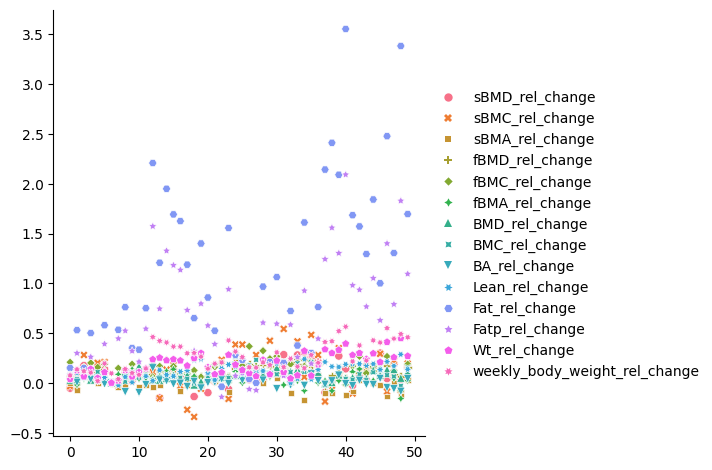

In [178]:
sns.relplot(data=wt_data)

In [179]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

wt_scaled = scaler.fit_transform(wt_data)
pcawt=PCA()
pcawt.fit(wt_scaled)
scores=pcawt.transform(wt_scaled)
scores

array([[-1.44461752e+00, -3.03301940e+00,  9.40674402e-01,
         4.77270161e-01, -1.45814183e-01, -8.94995587e-01,
        -1.90218926e-01,  1.98733672e-02, -1.69516370e-01,
         2.10437520e-01, -7.12530213e-02, -1.36153608e-01,
        -3.60350215e-02, -5.00284876e-02],
       [ 7.59741327e-01, -1.96600967e+00, -1.46094884e+00,
        -7.51335521e-01,  5.93095308e-01, -6.13520879e-01,
        -6.08617379e-01,  4.55816776e-02,  1.95765129e-01,
        -2.90572946e-03,  1.41881556e-01, -3.04515936e-02,
        -1.75410489e-02, -3.48274297e-04],
       [-2.60242146e+00, -6.45824658e-01, -6.47410194e-01,
        -8.00784899e-01,  1.76108661e-01,  4.72850648e-02,
        -1.14005604e-01, -2.71033054e-01,  6.71167445e-02,
        -5.50470365e-02, -1.33361912e-02,  9.31434361e-03,
        -5.98916377e-02, -2.90569130e-02],
       [-8.70143282e-01, -1.40531249e+00,  4.41602177e-01,
         3.55043218e-01,  6.75006124e-01, -3.73223967e-01,
        -3.37703027e-01, -8.49000129e-01, -9.

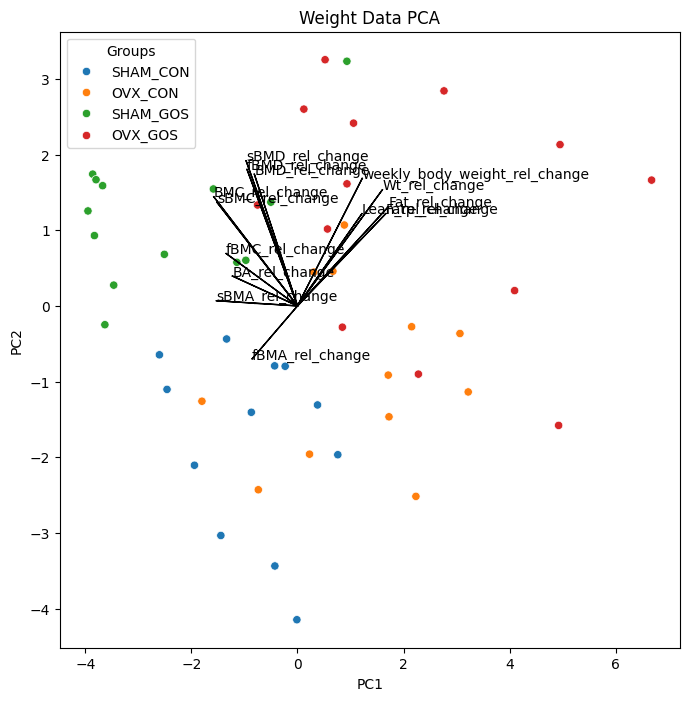

In [180]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('Weight Data PCA')

for k in range(pcawt.components_.shape[1]):
    ax.arrow(0, 0, pcawt.components_[i,k]*5, pcawt.components_[j,k]*5, color='k')
    ax.text(pcawt.components_[i,k]*5,
            pcawt.components_[j,k]*5,
            wt_data.columns[k])

In [181]:
pcawt.explained_variance_ratio_

array([4.28364977e-01, 2.15873276e-01, 1.07787026e-01, 9.06211011e-02,
       5.78250441e-02, 4.65240733e-02, 2.10161875e-02, 1.60959526e-02,
       9.89282831e-03, 3.28893435e-03, 1.63146833e-03, 7.25270358e-04,
       2.61825517e-04, 9.20358114e-05])

# Explained Variance Ratio

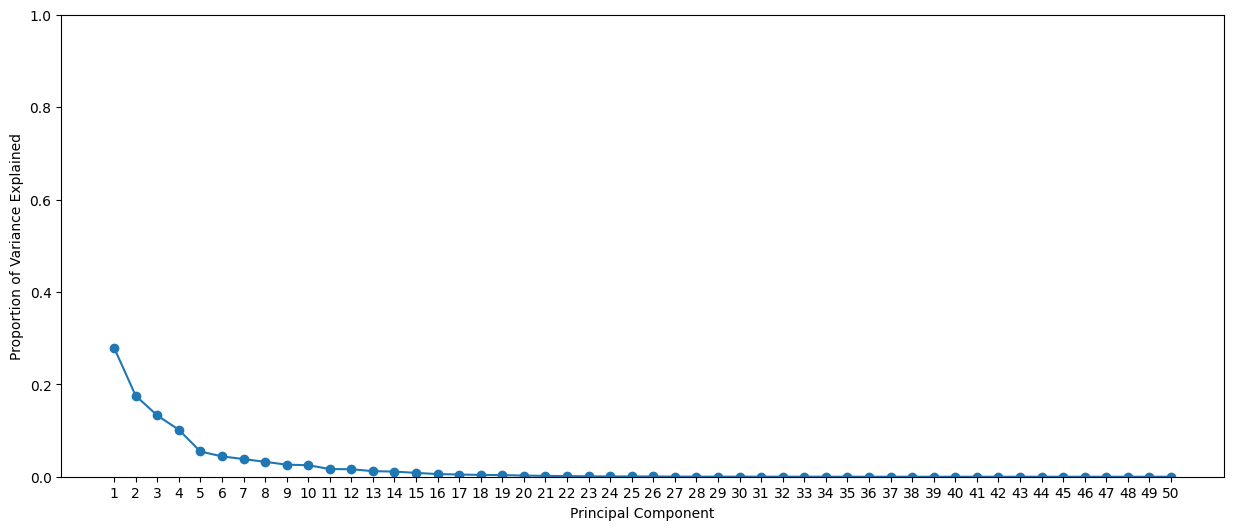

In [182]:
fig, ax = plt.subplots(figsize=(15, 6))
ticks = np.arange(pcaweek8.n_components_)+1
ax.plot(ticks,
        pcaweek8.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)


# PCA analysis with most important features

In [183]:
cols=[42,43,44,45,46,47,48,49]
allgrps=week8_num.drop(week8_num.columns[cols],axis=1)
allgrps

CTX1       P1NP  Osteocalcin     f_BVTV    f_TbTh    f_TbSp  \
0    8.678396  33.352875    43.001483   0.000000  0.000000  0.000000   
1   10.621891  24.924023    25.214914   0.000000  0.000000  0.000000   
2    8.724400  18.915117    17.316432   6.533580  0.060940  0.314338   
3    0.000000   0.000000     0.000000   9.561600  0.061400  0.282400   
4   10.588232  22.263223    60.376019   7.097617  0.056343  0.293051   
5    6.193446  21.564442    31.918405   7.297900  0.058200  0.301600   
6    0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
7    9.363910  33.984705     0.000000  10.729665  0.058021  0.259600   
8    8.359306  19.519946    19.608305   9.479761  0.063193  0.277121   
9   11.306601  21.584637    25.214914   9.502290  0.061055  0.279668   
10   0.000000   0.000000     0.000000   7.546084  0.056821  0.291818   
11   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
12  11.306601  24.451635    31.284779   6.416905  0.053910  0.308359   
13  13.405773  29.223103     0.000000   6.396768  0.056016  0.313107   
14  12.671102  30.053372    72.189993   5.391055  0.053981  0.307243   
15   0.000000   0.000000     0.000000   6.841239  0.053889  0.293742   
16  20.403581  30.727307    76.750690   9.772944  0.055007  0.263181   
17  11.463753  22.879739    10.770843   6.176383  0.056145  0.299415   
18  12.321855  19.126278    54.242681   6.945548  0.054754  0.298015   
19   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
20   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
21   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
22  17.571660  19.483802    68.110899   0.000000  0.000000  0.000000   
23  14.910253  24.900145    24.827034   8.411803  0.054967  0.284869   
24   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
25   9.002665  19.738325    47.695974  16.464109  0.070362  0.239621   
26  10.073351  21.972422    29.413434  18.732723  0.070731  0.220157   
27   8.344238  19.126278    10.770843  13.887900  0.068616  0.243989   
28   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
29   7.780039  15.668973     6.226505  12.096842  0.067774  0.256677   
30   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
31  11.996064  17.231206    33.849317  13.036060  0.071880  0.264899   
32   8.060115  16.931919     0.000000  16.546230  0.077128  0.255090   
33  10.024194  18.111352    38.305989   9.458395  0.064471  0.289839   
34  15.364816  21.828643    25.604849  16.111516  0.073198  0.257288   
35   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
36   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
37   8.045274  18.483049    24.249051   9.643020  0.057305  0.273860   
38   8.254073  20.870799    46.437761   8.389128  0.058152  0.296282   
39   7.634227  19.610620    46.188099   7.281459  0.059950  0.317209   
40   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
41   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
42   9.747833  11.944576    32.770993  11.969587  0.060739  0.261311   
43   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
44   9.065028  12.047518    24.633863  10.822638  0.061056  0.275020   
45  11.657408  18.862713    31.706645   9.319933  0.056694  0.271575   
46   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   
47   8.632497  14.110485    55.331110  11.422694  0.064239  0.260071   
48   7.217470  12.081991    36.944498   6.864526  0.064875  0.305008   
49   0.000000   0.000000     0.000000   0.000000  0.000000  0.000000   

       f_TbN   f_Tt.Ar   f_Ct.Ar   f_Ct.Th  ...  fBMA_rel_change  \
0   0.000000  0.000000  0.000000  0.000000  ...         0.139535   
1   0.000000  0.000000  0.000000  0.000000  ...        -0.020408   
2   1.072141  1.888325  0.973667  0.240256  ...         0.043478   
3   1.557200  1.841247  0.981967  0.248929  ...         0.090909

In [184]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)

allgrps_scaled = scaler.fit_transform(allgrps.drop(columns=['Groups']))

pca_allgrps=PCA(n_components=3)
pca_allgrps.fit(allgrps_scaled)


PCA(n_components=3)

In [185]:
scores=pca_allgrps.transform(allgrps_scaled)
scores

array([[-3.84690058,  0.09409313,  3.53804395],
       [-4.21422992,  0.86799824, -0.07329775],
       [ 2.64424922, -1.58164017,  1.84956022],
       [ 1.85687857, -0.56300475,  0.57910472],
       [ 3.08637605, -2.37291375,  0.90878658],
       [ 2.6218854 , -0.29008354,  1.97042467],
       [-5.07760418,  0.6702344 ,  1.77057478],
       [ 3.37006692,  1.8302491 ,  4.78497447],
       [ 2.78393093,  0.32431653,  0.41424804],
       [ 2.6753287 , -2.35817832,  0.04577526],
       [ 1.3355938 , -2.20323646, -2.52764955],
       [-5.18998606, -1.32489124, -0.55027373],
       [ 3.02039098,  2.49317237,  3.34743868],
       [ 2.68861833,  3.35414774,  2.68342535],
       [ 2.76934039,  2.35009613,  2.27998351],
       [ 2.10127374,  1.93819212,  3.53764148],
       [ 2.94453021,  1.10117034, -4.35086273],
       [ 1.88260052,  0.97520069, -1.5040017 ],
       [ 2.43666493,  2.83183619,  0.48498731],
       [-5.53006971,  3.04156751, -1.59391629],
       [-5.41541485, -0.85521592, -1.951

In [186]:
pca_allgrps.components_

array([[ 0.18505645,  0.18386866,  0.13508694,  0.2400492 ,  0.26382905,
         0.25960894,  0.25199144,  0.26423894,  0.26520475,  0.26532239,
         0.26512455,  0.26166649,  0.26264728,  0.26507272,  0.25903087,
         0.26533653, -0.01416716,  0.00947607,  0.03548921,  0.00227408,
         0.00451975,  0.00551143,  0.02288289,  0.06237554,  0.08775996,
         0.04639391,  0.05002642,  0.03015581,  0.05677193,  0.02676105,
        -0.00325126,  0.02910079, -0.00787955, -0.04190838,  0.01279055,
         0.03445308,  0.03133349, -0.02941013, -0.00425955,  0.00322297,
        -0.01763668,  0.00859299],
       [ 0.01895011,  0.04185626,  0.03255826, -0.07344886, -0.01431925,
         0.04299578, -0.04288331,  0.02547738,  0.00938239,  0.00428704,
         0.00338414,  0.04275813, -0.02648901, -0.01373197,  0.02867388,
         0.00595638,  0.04081984, -0.10471884, -0.14510456,  0.13301014,
         0.15747782,  0.09027927,  0.14441782,  0.04773398,  0.0156709 ,
         0.19852

In [187]:
pca_allgrps.components_.shape

(3, 42)

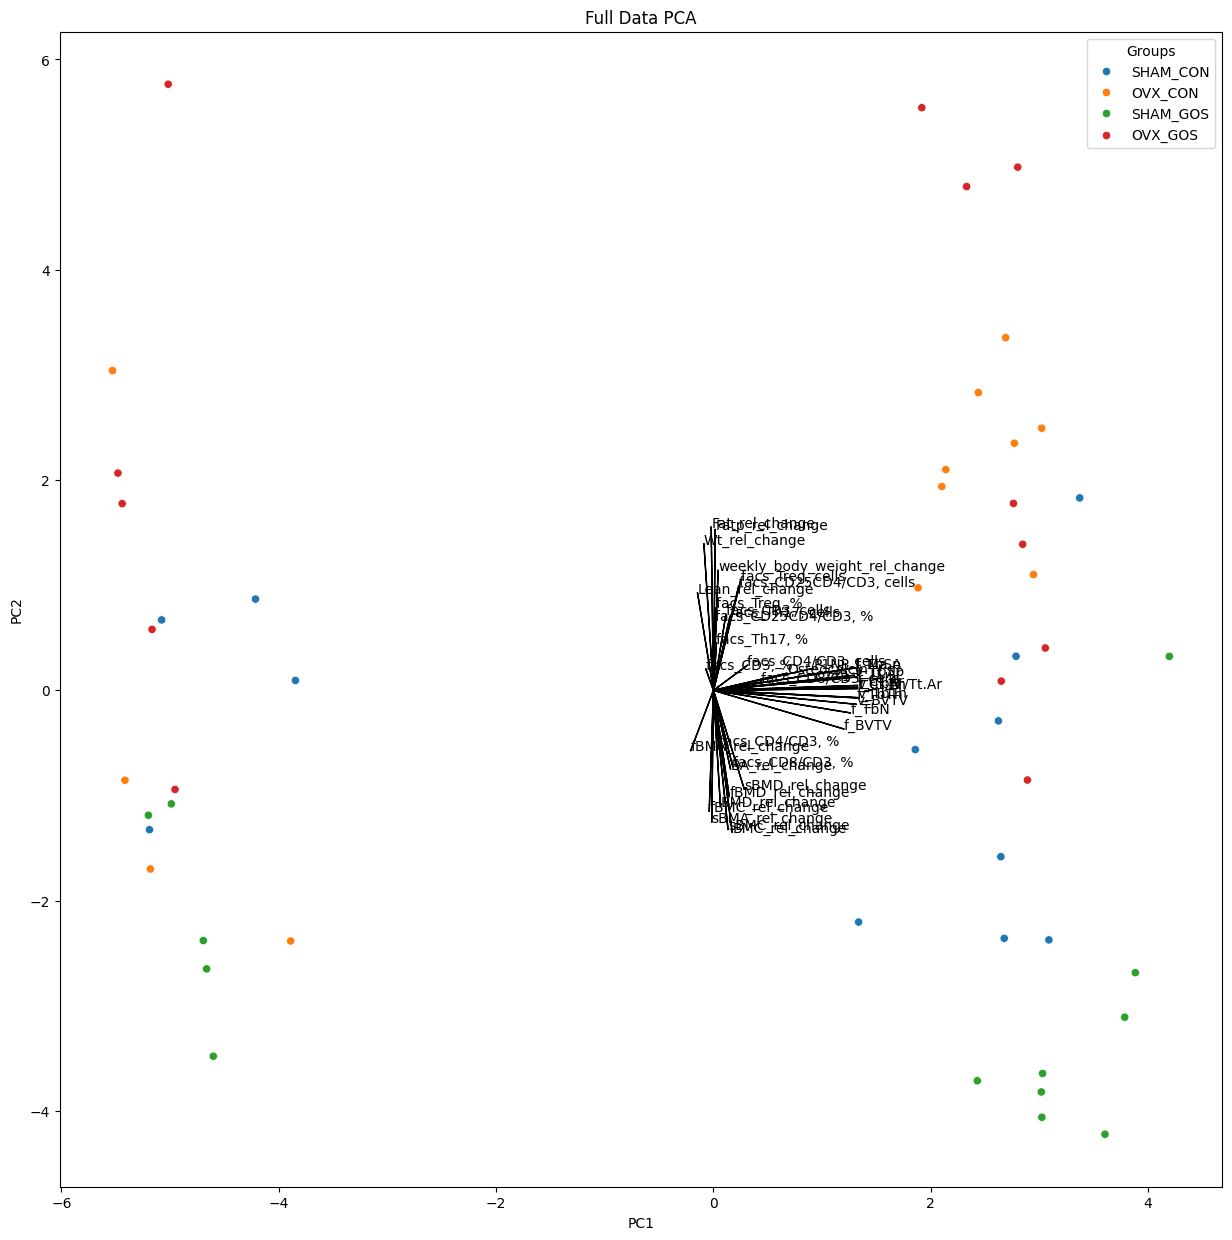

In [188]:
i,j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
ax.set_title('Full Data PCA')

for k in range(pca_allgrps.components_.shape[1]):
    ax.arrow(0, 0, pca_allgrps.components_[i,k]*5, pca_allgrps.components_[j,k]*5, color='k')
    ax.text(pca_allgrps.components_[i,k]*5,
            pca_allgrps.components_[j,k]*5,
            allgrps.columns[k])

In [189]:
pca_allgrps.components_.shape

(3, 42)

Text(0.5, 1.0, 'PC1 vs PC2')

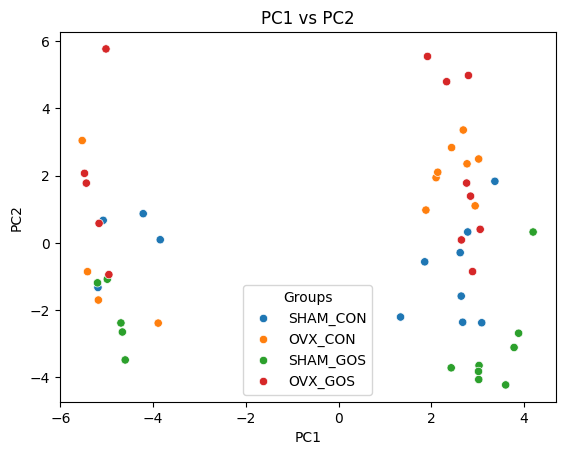

In [190]:
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1 vs PC2')

/tmp/ipython-input-3127298765.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  c.replace('SHAM_GOS',4,inplace=True)


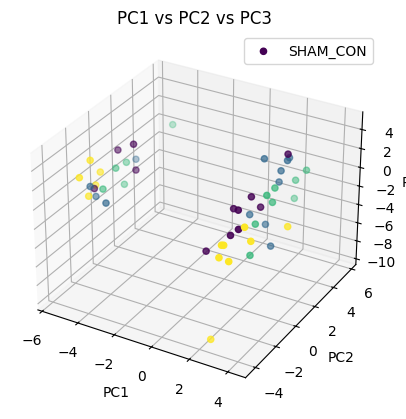

In [191]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

c=pd.DataFrame(allgrps['Groups'])
c.replace('SHAM_CON',1,inplace=True)
c.replace('OVX_CON',2,inplace=True)
c.replace('OVX_GOS',3,inplace=True)
c.replace('SHAM_GOS',4,inplace=True)
c=c.to_numpy()

ax.scatter(scores[:,0], scores[:,1], scores[:,2],c=c)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PC1 vs PC2 vs PC3')

ax.legend(['SHAM_CON','OVX_CON','OVX_GOS','SHAM_GOS'])

In [192]:
a=pd.DataFrame(scores)
df=pd.DataFrame()
df['Features']=allgrps.columns[0:42]
df['PC1']=a[0]
df['PC2']=a[1]
df['PC3']=a[2]

a=df
a

Features       PC1       PC2       PC3
0                            CTX1 -3.846901  0.094093  3.538044
1                            P1NP -4.214230  0.867998 -0.073298
2                     Osteocalcin  2.644249 -1.581640  1.849560
3                          f_BVTV  1.856879 -0.563005  0.579105
4                          f_TbTh  3.086376 -2.372914  0.908787
5                          f_TbSp  2.621885 -0.290084  1.970425
6                           f_TbN -5.077604  0.670234  1.770575
7                         f_Tt.Ar  3.370067  1.830249  4.784974
8                         f_Ct.Ar  2.783931  0.324317  0.414248
9                         f_Ct.Th  2.675329 -2.358178  0.045775
10                  f_Ct.Ar/Tt.Ar  1.335594 -2.203236 -2.527650
11                         f_Ma.A -5.189986 -1.324891 -0.550274
12                         v_BVTV  3.020391  2.493172  3.347439
13                         v_TbTh  2.688618  3.354148  2.683425
14                         v_TbSp  2.769340  2.350096  2.279984
15                          v_TbN  2.101274  1.938192  3.537641
16                    facs_CD3, %  2.944530  1.101170 -4.350863
17                facs_CD4/CD3, %  1.882601  0.975201 -1.504002
18                facs_CD8/CD3, %  2.436665  2.831836  0.484987
19            facs_CD25CD4/CD3, % -5.530070  3.041568 -1.593916
20                   facs_Treg, % -5.415415 -0.855216 -1.951792
21                   facs_Th17, % -5.181168 -1.698544  0.023835
22                facs_CD3, cells -3.890840 -2.383604 -0.353725
23            facs_CD4/CD3, cells  2.137764  2.099634 -3.485011
24            facs_CD8/CD3, cells -4.694791 -2.379374  3.639570
25        facs_CD25CD4/CD3, cells  3.881607 -2.684529  0.473531
26               facs_Treg, cells  3.784094 -3.108212  2.256245
27               facs_Th17, cells  3.028557 -3.642831  0.523427
28                sBMD_rel_change -4.988621 -1.079267  1.078575
29                sBMC_rel_change  3.016764 -3.819033  0.698961
30                sBMA_rel_change -5.199816 -1.187093 -0.312312
31                fBMD_rel_change  3.602285 -4.220993 -0.202551
32                fBMC_rel_change  2.427908 -3.712749 -9.595563
33                fBMA_rel_change  3.021789 -4.059928 -0.325683
34                 BMD_rel_change  4.194430  0.323110 -0.797651
35                 BMC_rel_change -4.602345 -3.479030  2.911065
36                  BA_rel_change -4.663707 -2.648605  0.183457
37                Lean_rel_change  2.329423  4.790823 -1.201091
38                 Fat_rel_change  2.799816  4.975628 -0.046907
39                Fatp_rel_change  2.760134  1.778199  1.015271
40                  Wt_rel_change -5.017261  5.764307  0.051874
41  weekly_body_weight_rel_change -5.480094  2.066630 -1.020188

In [193]:
a1_sorted=a.sort_values(by=['PC1'],key=abs,ascending=False)
a1_sorted

Features       PC1       PC2       PC3
19            facs_CD25CD4/CD3, % -5.530070  3.041568 -1.593916
41  weekly_body_weight_rel_change -5.480094  2.066630 -1.020188
20                   facs_Treg, % -5.415415 -0.855216 -1.951792
30                sBMA_rel_change -5.199816 -1.187093 -0.312312
11                         f_Ma.A -5.189986 -1.324891 -0.550274
21                   facs_Th17, % -5.181168 -1.698544  0.023835
6                           f_TbN -5.077604  0.670234  1.770575
40                  Wt_rel_change -5.017261  5.764307  0.051874
28                sBMD_rel_change -4.988621 -1.079267  1.078575
24            facs_CD8/CD3, cells -4.694791 -2.379374  3.639570
36                  BA_rel_change -4.663707 -2.648605  0.183457
35                 BMC_rel_change -4.602345 -3.479030  2.911065
1                            P1NP -4.214230  0.867998 -0.073298
34                 BMD_rel_change  4.194430  0.323110 -0.797651
22                facs_CD3, cells -3.890840 -2.383604 -0.353725
25        facs_CD25CD4/CD3, cells  3.881607 -2.684529  0.473531
0                            CTX1 -3.846901  0.094093  3.538044
26               facs_Treg, cells  3.784094 -3.108212  2.256245
31                fBMD_rel_change  3.602285 -4.220993 -0.202551
7                         f_Tt.Ar  3.370067  1.830249  4.784974
4                          f_TbTh  3.086376 -2.372914  0.908787
27               facs_Th17, cells  3.028557 -3.642831  0.523427
33                fBMA_rel_change  3.021789 -4.059928 -0.325683
12                         v_BVTV  3.020391  2.493172  3.347439
29                sBMC_rel_change  3.016764 -3.819033  0.698961
16                    facs_CD3, %  2.944530  1.101170 -4.350863
38                 Fat_rel_change  2.799816  4.975628 -0.046907
8                         f_Ct.Ar  2.783931  0.324317  0.414248
14                         v_TbSp  2.769340  2.350096  2.279984
39                Fatp_rel_change  2.760134  1.778199  1.015271
13                         v_TbTh  2.688618  3.354148  2.683425
9                         f_Ct.Th  2.675329 -2.358178  0.045775
2                     Osteocalcin  2.644249 -1.581640  1.849560
5                          f_TbSp  2.621885 -0.290084  1.970425
18                facs_CD8/CD3, %  2.436665  2.831836  0.484987
32                fBMC_rel_change  2.427908 -3.712749 -9.595563
37                Lean_rel_change  2.329423  4.790823 -1.201091
23            facs_CD4/CD3, cells  2.137764  2.099634 -3.485011
15                          v_TbN  2.101274  1.938192  3.537641
17                facs_CD4/CD3, %  1.882601  0.975201 -1.504002
3                          f_BVTV  1.856879 -0.563005  0.579105
10                  f_Ct.Ar/Tt.Ar  1.335594 -2.203236 -2.527650

In [194]:
arrow_vals1=np.array(a1_sorted)
arrow_vals1

array([['facs_CD25CD4/CD3, %', -5.530069714539378, 3.0415675141966676,
        -1.5939162881354598],
       ['weekly_body_weight_rel_change', -5.4800941214224315,
        2.066630324599145, -1.0201882426147897],
       ['facs_Treg, %', -5.415414852188653, -0.8552159248688695,
        -1.9517922641246928],
       ['sBMA_rel_change', -5.199816467435424, -1.1870930996885132,
        -0.31231181818211656],
       ['f_Ma.A', -5.189986058107323, -1.32489124366551,
        -0.5502737262643583],
       ['facs_Th17, %', -5.181168064801528, -1.6985435585901318,
        0.023834724406462837],
       ['f_TbN', -5.077604184340035, 0.6702343975799234,
        1.7705747755598082],
       ['Wt_rel_change', -5.0172611189119145, 5.7643071072730665,
        0.051874187054085696],
       ['sBMD_rel_change', -4.988620826353839, -1.0792672453493868,
        1.0785754109040506],
       ['facs_CD8/CD3, cells', -4.6947910989678086, -2.3793740080448735,
        3.639569623408398],
       ['BA_rel_change', -4.66

In [195]:
arrow_vals1[0,1]

-5.530069714539378

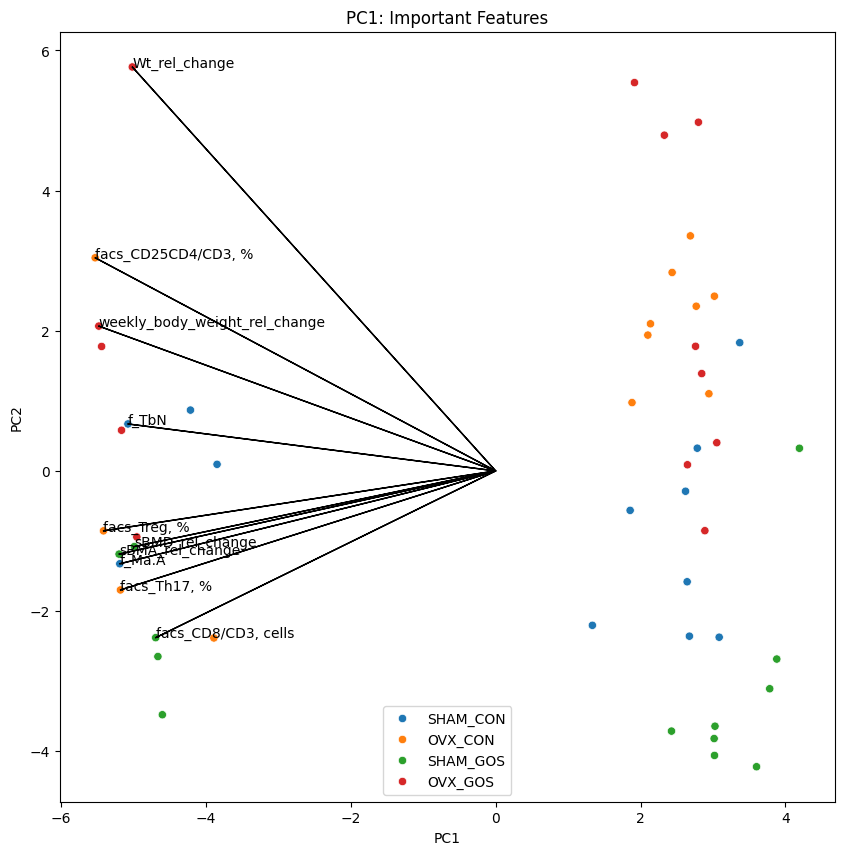

In [196]:
fig, ax = plt.subplots(figsize=(10, 10))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1: Important Features')
ax.legend(loc='lower center')

#top 10 features related to PC1
for i in range(10):
  ax.arrow(0,0,arrow_vals1[i,1],arrow_vals1[i,2],color='k')
  ax.text(arrow_vals1[i,1],arrow_vals1[i,2],arrow_vals1[i,0])

#bottom 5 features
#for i in range(37,42):
 # ax.arrow(0,0,arrow_vals[i,1],arrow_vals[i,2],color='m')
  #ax.text(arrow_vals[i,1],arrow_vals[i,2],arrow_vals[i,0])

In [197]:
a2_sorted=a.sort_values(by=['PC2'],key=abs,ascending=False)
a2_sorted

Features       PC1       PC2       PC3
40                  Wt_rel_change -5.017261  5.764307  0.051874
38                 Fat_rel_change  2.799816  4.975628 -0.046907
37                Lean_rel_change  2.329423  4.790823 -1.201091
31                fBMD_rel_change  3.602285 -4.220993 -0.202551
33                fBMA_rel_change  3.021789 -4.059928 -0.325683
29                sBMC_rel_change  3.016764 -3.819033  0.698961
32                fBMC_rel_change  2.427908 -3.712749 -9.595563
27               facs_Th17, cells  3.028557 -3.642831  0.523427
35                 BMC_rel_change -4.602345 -3.479030  2.911065
13                         v_TbTh  2.688618  3.354148  2.683425
26               facs_Treg, cells  3.784094 -3.108212  2.256245
19            facs_CD25CD4/CD3, % -5.530070  3.041568 -1.593916
18                facs_CD8/CD3, %  2.436665  2.831836  0.484987
25        facs_CD25CD4/CD3, cells  3.881607 -2.684529  0.473531
36                  BA_rel_change -4.663707 -2.648605  0.183457
12                         v_BVTV  3.020391  2.493172  3.347439
22                facs_CD3, cells -3.890840 -2.383604 -0.353725
24            facs_CD8/CD3, cells -4.694791 -2.379374  3.639570
4                          f_TbTh  3.086376 -2.372914  0.908787
9                         f_Ct.Th  2.675329 -2.358178  0.045775
14                         v_TbSp  2.769340  2.350096  2.279984
10                  f_Ct.Ar/Tt.Ar  1.335594 -2.203236 -2.527650
23            facs_CD4/CD3, cells  2.137764  2.099634 -3.485011
41  weekly_body_weight_rel_change -5.480094  2.066630 -1.020188
15                          v_TbN  2.101274  1.938192  3.537641
7                         f_Tt.Ar  3.370067  1.830249  4.784974
39                Fatp_rel_change  2.760134  1.778199  1.015271
21                   facs_Th17, % -5.181168 -1.698544  0.023835
2                     Osteocalcin  2.644249 -1.581640  1.849560
11                         f_Ma.A -5.189986 -1.324891 -0.550274
30                sBMA_rel_change -5.199816 -1.187093 -0.312312
16                    facs_CD3, %  2.944530  1.101170 -4.350863
28                sBMD_rel_change -4.988621 -1.079267  1.078575
17                facs_CD4/CD3, %  1.882601  0.975201 -1.504002
1                            P1NP -4.214230  0.867998 -0.073298
20                   facs_Treg, % -5.415415 -0.855216 -1.951792
6                           f_TbN -5.077604  0.670234  1.770575
3                          f_BVTV  1.856879 -0.563005  0.579105
8                         f_Ct.Ar  2.783931  0.324317  0.414248
34                 BMD_rel_change  4.194430  0.323110 -0.797651
5                          f_TbSp  2.621885 -0.290084  1.970425
0                            CTX1 -3.846901  0.094093  3.538044

In [198]:
arrow_vals2=np.array(a2_sorted)
arrow_vals2

array([['Wt_rel_change', -5.0172611189119145, 5.7643071072730665,
        0.051874187054085696],
       ['Fat_rel_change', 2.7998159166636616, 4.975627752960488,
        -0.046907186727791025],
       ['Lean_rel_change', 2.3294232277818585, 4.790822630317523,
        -1.201090518900162],
       ['fBMD_rel_change', 3.602284550132534, -4.2209934153203985,
        -0.20255105603921258],
       ['fBMA_rel_change', 3.021789333302271, -4.059927727111336,
        -0.3256825364296766],
       ['sBMC_rel_change', 3.016764011997775, -3.8190332693719804,
        0.6989613509398459],
       ['fBMC_rel_change', 2.4279079127813255, -3.7127493579807416,
        -9.595562887763894],
       ['facs_Th17, cells', 3.0285569869737166, -3.6428305129843186,
        0.5234268961405815],
       ['BMC_rel_change', -4.602344590879666, -3.4790296067231243,
        2.911065333627173],
       ['v_TbTh', 2.6886183294787127, 3.354147738396373,
        2.6834253545296165],
       ['facs_Treg, cells', 3.784093547751395

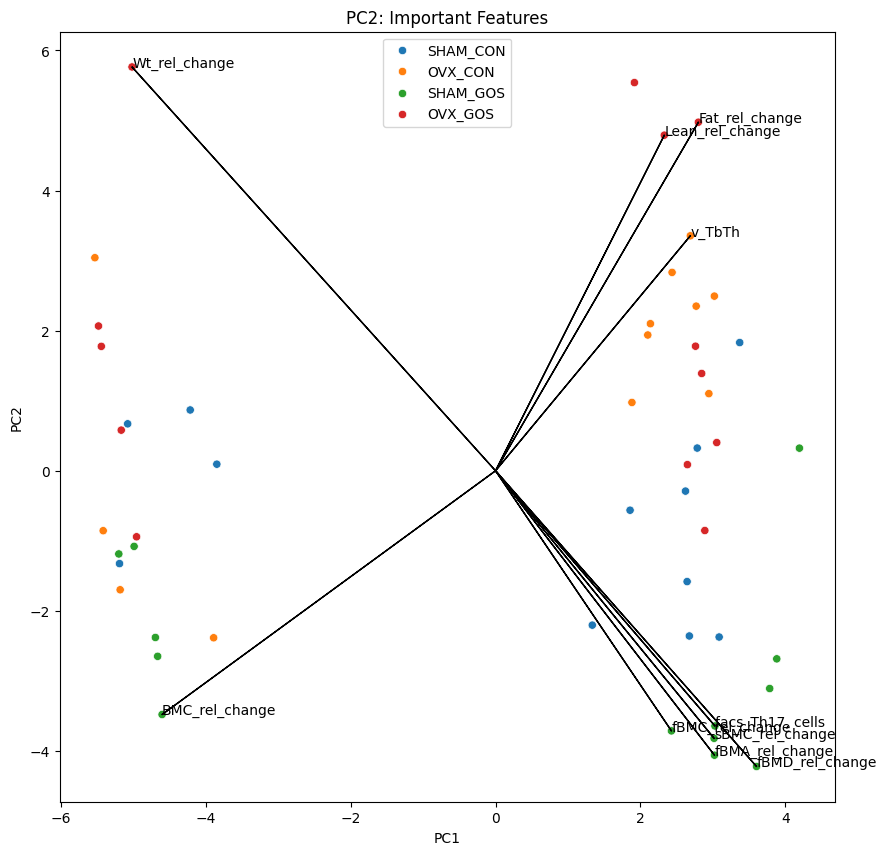

In [199]:
fig, ax = plt.subplots(figsize=(10, 10))
ax=sns.scatterplot(x=scores[:,0], y=scores[:,1], hue=week8_num['Groups'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC2: Important Features')
ax.legend(loc='upper center')

#top 10 features related to PC2
for i in range(10):
  ax.arrow(0,0,arrow_vals2[i,1],arrow_vals2[i,2],color='k')
  ax.text(arrow_vals2[i,1],arrow_vals2[i,2],arrow_vals2[i,0])